## 서울시 전동킥보드 사고 현황 분석 및 견인 현황 시각화

**데이터 분석 목적**\
<서울시 전동킥보드 사고 현황 분석>
- 전동킥보드의 사고율이 늘어남에따라 이용에대한 안전수칙과 같은 제도들이 늘어남에도 이용자들의 전동킥보드 사고에대한 경각심은 부족하다. 따라서 전동킥보드의 사고율에대한 분석을 통하여 이용자들에게 사고에 대한 경각심을 일으켜 사고 예방의 효과를 기대해 볼수 있다.

<서울시 전동킥보드 견인 현황 시각화>
- 서울시는 무단 주차된 전동킥보드를 강제 견인 하는 정책을 시행하고있다. 이러한 정책은 현재 여러 지자체에서도 도입을 추진 중에 있다. 견인 정책에 대해서 정책시행 전과 후의 민원 양을 확인하여 정책의 효과를 파악해 보고 실제로 견인된 구역과 유형을 파악하고 시각화 함으로써 서울시 전동 킥보드 이용자 들에게 정보를 제공 할수 있다.

**처리 사항**
1. 서울시 전체 전동킥보드 사고현황 분석 (2017 - 2021) 
>-taas 차종별 교통사고 데이터(2017~2021)<br>
• 시군구 차종별 -서울 / 개인형 이동장치 추출<br>
• 차종별 월별 - 개인형 이동장치 추출<br>
• 차종별 요일별 - 개인형 이동장치 추출<br>
• 차종별 시간별 - 개인형 이동장치 추출<br>
• 보호구 착용 현황 데이터 - 안전모 추출

2. 서울시 구별 전동킥보드 사고현황 분석 (2018-2021)
>-성별, 날씨별, 위반 유형별 등 사고율 (2018~2021)<br>
• 성별 - 구별 분류, 년도 총합, 성별 분류, pm 추출<br>
• 날씨별 - 구별 분류, 년도 총합, 날씨 분류, pm 추출<br>
• 연령별 - 구별 분류, 년도 총합, 연령별 분류, pm추출<br>
• 위반유형별 - 구별 분류, 년도 총합, 위반유형별 분류, pm추출

3. 서울시 전동킥보드 견인 구역, 유형별 시각화 (2021-2022)
>-서울시 전동킥보드 견인 현황(2021-2022) → kakao rest api,geocode 를 활용하여 주소를 좌표로 변환하여 견인구역 시각화, 유형별로 나눠져 있는것을 서울시에서 정한 5개의 즉시견인구역 + 주정차 금지구역으로 분류

4. 서울시 전동킥보드 무단주차 민원 건수 분석 (2019.07.01-2023.02.28)
>-서울정보소통광장 전동킥보드 관련 민원 건수 크롤링 - 민원 전동킥보드 무단방치 관련, <br>국민신문고 전동킥보드 무단방치 관련(21.07.15 앞뒤 2년 자료)




**참조**
>- **서울을 선정한 이유는 전국에서 가장 전동킥보드의 사고율이 많은 구역 <br>
(출처 :https://www.sedaily.com/NewsView/26B75ZUAC6 )**
>- **각 데이터간 기간은 tass(교통사고 분석시스템)에서 개인형 이동장치(pm)이 집체된 시점부터 최신 데이터까지 설정**
>- **민원 크롤링 시점은 서울시에서 견인제도를 시행한 시점의 앞뒤 2년으로 설정<br>
(시점 근거 : https://www.etnews.com/20220718000136)**

**활용데이터**
1. 서울시 전동킥보드 견인 현황
\
(2021-2022) (출처 : 서울 열린 데이터 광장) (60606행 6열) 
\
https://data.seoul.go.kr/dataList/OA-21304/S/1/datasetView.do)

2. taas 차종별 교통사고 데이터<br>
• 시군구 차종별 (1430행 66열)<br>
• 차종별 월별 (44행 67열)<br>
• 차종별 요일별 (42행 44열)<br>
• 차종별 시간별 (667행 43열)<br>
• 보호구 착용 현황 (6행 116열) 
\
((2017~2021) (출처 : 도로교통공단)
\
https://taas.koroad.or.kr/sta/acs/exs/typical.do?menuId=WEB_KMP_OVT_UAS_PDS)

3. tass 성별, 날씨별, 위반 유형별 등 사고율<br>
• 성별(1874행 10열)  <br>
• 날씨별 (2885행 10열) <br>
• 연령별 (4546행 12열)  <br>
• 위반유형별 (5305행 11열)
\
(2018-2021) (출처 : 도로교통공단)
\
https://tmacs.kotsa.or.kr/web/TG/TG200/TG2100S/Tg2102.jsp?mid=S1202#

4. 서울정보소통광장 전동킥보드 민원 건수 
\
(2019.07.01-2023.02.28) (출처 : 서울정보소통광장) 
\
https://opengov.seoul.go.kr/)

\
**수행도구**
 pandas, ipynb, excel,streamlit,plotly,kakao rest api, geocode


In [ ]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import platform
from geopy.geocoders import Nominatim
import folium
from bs4 import BeautifulSoup
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
import tqdm
from tqdm.notebook import tqdm
from glob import glob
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Windows': 
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
from urllib.request import urlopen
import datetime

In [ ]:

from folium.plugins import MarkerCluster

In [ ]:
service = ChromeService(executable_path = ChromeDriverManager().install())

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.79M/6.79M [00:00<00:00, 61.0MB/s]


In [ ]:
#진행사항 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [ ]:
#칼럼과 로우 수를 최대 50개 까지 출력
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)


In [ ]:
#시각화시 한글 깨짐 해결

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

## 1. 서울시 전체 전동킥보드 사고현황 분석 (2017 - 2021)



**활용 데이터 taas 차종별 교통사고 데이터(2017~2021)**<br>
>•시군구 차종별 -서울 / 개인형 이동장치 추출<br>
• 차종별 월별 - 개인형 이동장치 추출<br>
• 차종별 요일별 - 개인형 이동장치 추출<br>
• 차종별 시간별 - 개인형 이동장치 추출<br>
• 보호구 착용 현황 데이터 - 안전모 추출


#### 데이터 전처리 개요
>- 데이터불러오기,데이터추출,인덱스이름 변경,칼럼이름변경
>- 결측치제거,중복값제거
> - 행과열치환,데이터 병합
> - 선그래프,누적막대그래프,파이차트그래프,히트맵 시각화
> - 열 재구성

#### 서울시 월별 개인형이동장치 사고 현황

**데이터불러오기**

In [ ]:
month = pd.read_excel('./data/차종별 월별.xls', header = 1)

**데이터 확인**

In [ ]:
month
month.info()

In [ ]:
month['가해운전자 차종별 '].unique()

array(['합계', '승용차', '승합차', '화물차', '특수차', '이륜차', '사륜오토바이(ATV)', '원동기장치자전거',
       '자전거', '개인형이동수단(PM)', '건설기계', '농기계', '기타', '불명', '출처) 도로교통공단.'],
      dtype=object)

**데이터 추출**

In [ ]:
month = month[month['가해운전자 차종별 '].str.contains('개인형*', na = False) & (month['사고년도'].str.contains('사고건수',na=False))]

**결측치제거**

In [ ]:
month = month.replace('-', 0)

In [ ]:
month.iloc[0].unique()

array(['개인형이동수단(PM)', '사고건수', 29.0, 0, 1, 3, 4, 2, 50.0, 5, 6, 9, 134, 7,
       10, 20, 19, 21, 23, 14, 387.0, 12, 31, 33, 46, 41, 64, 48, 18,
       445.0, 35.0, 54, 43, 44, 49, 39, 36, 34, 28], dtype=object)

In [ ]:
month.columns

Index(['가해운전자 차종별 ', '사고년도', '합계', '01월', '02월', '03월', '04월', '05월', '06월',
       '07월', '08월', '09월', '10월', '11월', '12월', '합계.1', '01월.1', '02월.1',
       '03월.1', '04월.1', '05월.1', '06월.1', '07월.1', '08월.1', '09월.1', '10월.1',
       '11월.1', '12월.1', '합계.2', '01월.2', '02월.2', '03월.2', '04월.2', '05월.2',
       '06월.2', '07월.2', '08월.2', '09월.2', '10월.2', '11월.2', '12월.2', '합계.3',
       '01월.3', '02월.3', '03월.3', '04월.3', '05월.3', '06월.3', '07월.3', '08월.3',
       '09월.3', '10월.3', '11월.3', '12월.3', '합계.4', '01월.4', '02월.4', '03월.4',
       '04월.4', '05월.4', '06월.4', '07월.4', '08월.4', '09월.4', '10월.4', '11월.4',
       '12월.4'],
      dtype='object')

**연도별 데이터 프레임 생성**

In [ ]:
month_2017 = month[['01월', '02월', '03월', '04월', '05월', '06월','07월', '08월', '09월', '10월', '11월', '12월']]
month_2018 = month[['01월.1', '02월.1','03월.1', '04월.1', '05월.1', '06월.1', '07월.1', '08월.1', '09월.1', '10월.1','11월.1', '12월.1']]
month_2019 = month[['01월.2', '02월.2','03월.2', '04월.2', '05월.2','06월.2', '07월.2', '08월.2', '09월.2', '10월.2', '11월.2', '12월.2']]
month_2020 = month[['01월.3', '02월.3','03월.3', '04월.3', '05월.3', '06월.3', '07월.3', '08월.3','09월.3', '10월.3', '11월.3', '12월.3']]
month_2021 = month[['01월.4', '02월.4','03월.4','04월.4', '05월.4', '06월.4', '07월.4', '08월.4', '09월.4', '10월.4', '11월.4','12월.4']]

**index재설정**

In [ ]:
month_2017.index = ['2017년']
month_2018.index = ['2018년']
month_2019.index = ['2019년']
month_2020.index = ['2020년']
month_2021.index = ['2021년']

**columns 재설정**

In [ ]:
month_2018.columns = ['01월', '02월', '03월', '04월', '05월', '06월','07월', '08월', '09월', '10월', '11월', '12월']
month_2019.columns = ['01월', '02월', '03월', '04월', '05월', '06월','07월', '08월', '09월', '10월', '11월', '12월']
month_2020.columns = ['01월', '02월', '03월', '04월', '05월', '06월','07월', '08월', '09월', '10월', '11월', '12월']
month_2021.columns = ['01월', '02월', '03월', '04월', '05월', '06월','07월', '08월', '09월', '10월', '11월', '12월']

**5개년도를 하나의 데이터프레임으로 병합**

In [ ]:
month = pd.concat([month_2017,month_2018,month_2019,month_2020,month_2021], axis=0)

**index month로 설정**

In [ ]:

month_total=month.T

**index이름설정**

In [ ]:
month_total.index.name = '월별'

**csv로 저장**

In [ ]:
month_total.to_csv("./data/month_total.csv")

#### 서울시 요일별 사고현황

**데이터불러오기**

In [ ]:
day = pd.read_excel('./data/차종별 요일별.xls', header=1) # 칼럼을 요일로설정

**데이터 확인**

In [ ]:
day
day.info()

In [ ]:
day['가해운전자 차종별 '].unique()

array(['합계', '승용차', '승합차', '화물차', '특수차', '이륜차', '사륜오토바이(ATV)', '원동기장치자전거',
       '자전거', '개인형이동수단(PM)', '건설기계', '농기계', '기타', '불명', nan], dtype=object)

**데이터 추출**

In [ ]:
day1 = day[day['가해운전자 차종별 '].str.contains('개인형*', na = False) & (day['사고년도'].str.contains('사고건수',na=False))]

In [ ]:
day1.columns

Index(['가해운전자 차종별 ', '사고년도', '합계', '일', '월', '화', '수', '목', '금', '토', '합계.1',
       '일.1', '월.1', '화.1', '수.1', '목.1', '금.1', '토.1', '합계.2', '일.2', '월.2',
       '화.2', '수.2', '목.2', '금.2', '토.2', '합계.3', '일.3', '월.3', '화.3', '수.3',
       '목.3', '금.3', '토.3', '합계.4', '일.4', '월.4', '화.4', '수.4', '목.4', '금.4',
       '토.4'],
      dtype='object')

**년도별 데이터 프레임 설정**

In [ ]:
day1_2017 = day1[['월', '화', '수', '목', '금', '토','일']]
day1_2018 = day1[['월.1', '화.1', '수.1', '목.1', '금.1', '토.1','일.1']]
day1_2019 = day1[['월.2','화.2', '수.2', '목.2', '금.2', '토.2','일.2']]
day1_2020 = day1[['월.3', '화.3', '수.3','목.3', '금.3', '토.3','일.3']]
day1_2021 = day1[['월.4', '화.4', '수.4', '목.4', '금.4','토.4','일.4']]

**index 설정**

In [ ]:
day1_2017.index = ['2017년']
day1_2018.index = ['2018년']
day1_2019.index = ['2019년']
day1_2020.index = ['2020년']
day1_2021.index = ['2021년']

**column 이름 설정**

In [ ]:
day1_2018.columns = ['월', '화', '수', '목', '금', '토','일']
day1_2019.columns = ['월', '화', '수', '목', '금', '토','일']
day1_2020.columns = ['월', '화', '수', '목', '금', '토','일']
day1_2021.columns = ['월', '화', '수', '목', '금', '토','일']

**5개년도 병합**

In [ ]:
day=pd.concat([day1_2017, day1_2018, day1_2019, day1_2020, day1_2021])

**index 전환**

In [ ]:
day_total=day.T

**csv 저장**

In [ ]:
day_total.to_csv("./data/day_total.csv")

#### 서울시 시간별 개인형이동장치 사고 현황

**데이터불러오기**

In [ ]:
hour = pd.read_excel('./data/차종별 시간별.xls',header=1)# 칼럼을 시간으로 설정

**데이터 확인**

In [ ]:
hour
hour.info()

In [ ]:
hour.columns

Index(['가해운전자 차종별 ', '사고년도', '합계', '00시-02시', '02시-04시', '04시-06시', '06시-08시',
       '08시-10시', '10시-12시', '12시-14시', '14시-16시', '16시-18시', '18시-20시',
       '20시-22시', '22시-24시', '합계.1', '00시-02시.1', '02시-04시.1', '04시-06시.1',
       '06시-08시.1', '08시-10시.1', '10시-12시.1', '12시-14시.1', '14시-16시.1',
       '16시-18시.1', '18시-20시.1', '20시-22시.1', '22시-24시.1', '합계.2', '00시-02시.2',
       '02시-04시.2', '04시-06시.2', '06시-08시.2', '08시-10시.2', '10시-12시.2',
       '12시-14시.2', '14시-16시.2', '16시-18시.2', '18시-20시.2', '20시-22시.2',
       '22시-24시.2', '합계.3', '00시-02시.3', '02시-04시.3', '04시-06시.3', '06시-08시.3',
       '08시-10시.3', '10시-12시.3', '12시-14시.3', '14시-16시.3', '16시-18시.3',
       '18시-20시.3', '20시-22시.3', '22시-24시.3', '합계.4', '00시-02시.4', '02시-04시.4',
       '04시-06시.4', '06시-08시.4', '08시-10시.4', '10시-12시.4', '12시-14시.4',
       '14시-16시.4', '16시-18시.4', '18시-20시.4', '20시-22시.4', '22시-24시.4'],
      dtype='object')

개인형이동장치의 사고 현황을 파악하기 위하여 가해운전자 차종별 컬럼의 속성 값 확인

In [ ]:
hour['가해운전자 차종별 '].unique()

array(['합계', '승용차', '승합차', '화물차', '특수차', '이륜차', '사륜오토바이(ATV)', '원동기장치자전거',
       '자전거', '개인형이동수단(PM)', '건설기계', '농기계', '기타', '불명', nan], dtype=object)

**데이터 추출**

In [ ]:
hour = hour[hour['가해운전자 차종별 '].str.contains('개인형*', na = False) & (hour['사고년도'].str.contains('사고건수',na=False))]

**데이터 프레임의 결측치값('-')을 0건으로 변환**

In [ ]:
hour = hour.replace('-', 0)
hour.iloc[0].unique()

array(['개인형이동수단(PM)', '사고건수', 29.0, 0, 1, 4, 7, 2, 3, 50.0, 8, 5, 9, 6,
       134, 21, 15, 16, 18, 13, 387.0, 36, 11, 14, 32, 24, 56, 59, 42, 46,
       445.0, 10, 49, 41, 44, 72, 70], dtype=object)

**년도별 데이터 프레임 설정**

In [ ]:
year_2017 = hour[['00시-02시', '02시-04시', '04시-06시', '06시-08시','08시-10시', '10시-12시',
             '12시-14시', '14시-16시', '16시-18시', '18시-20시','20시-22시', '22시-24시']]
year_2018 = hour[['00시-02시.1', '02시-04시.1', '04시-06시.1', '06시-08시.1', '08시-10시.1',
                  '10시-12시.1', '12시-14시.1', '14시-16시.1',
                    '16시-18시.1', '18시-20시.1', '20시-22시.1', '22시-24시.1']]
year_2019 = hour[['00시-02시.2','02시-04시.2', '04시-06시.2', '06시-08시.2', 
                  '08시-10시.2', '10시-12시.2','12시-14시.2', '14시-16시.2', 
                  '16시-18시.2', '18시-20시.2', '20시-22시.2','22시-24시.2']]
year_2020 = hour[['00시-02시.3', '02시-04시.3', '04시-06시.3', '06시-08시.3',
                  '08시-10시.3', '10시-12시.3', '12시-14시.3', '14시-16시.3', '16시-18시.3',
                    '18시-20시.3', '20시-22시.3', '22시-24시.3']]
year_2021 = hour[['00시-02시.4', '02시-04시.4',
       '04시-06시.4', '06시-08시.4', '08시-10시.4', '10시-12시.4', '12시-14시.4',
       '14시-16시.4', '16시-18시.4', '18시-20시.4', '20시-22시.4', '22시-24시.4']]

**index 설정**

In [ ]:
year_2017 = year_2017.T
year_2018 = year_2018.T
year_2019 = year_2019.T
year_2020 = year_2020.T
year_2021 = year_2021.T

In [ ]:
index_list =['00시-02시', '02시-04시', '04시-06시', '06시-08시','08시-10시', '10시-12시',
             '12시-14시', '14시-16시', '16시-18시', '18시-20시','20시-22시', '22시-24시']

In [ ]:
year_2018.index = index_list
year_2019.index = index_list
year_2020.index = index_list
year_2021.index = index_list

**5개년도 병합**

In [ ]:
year_total = pd.concat([year_2017,year_2018,year_2019,year_2020,year_2021],axis=1)

**column 이름 설정**

In [ ]:
year_total.columns=['2017','2018','2019','2020','2021']

**csv 저장**

In [ ]:
year_total.to_csv("./data/year_total.csv")

#### 서울시 보호구에 따른 개인형이동장치 사고 현황

**데이터 불러오기**

In [ ]:
helmet = pd.read_excel('./data/보호구 착용.xls', header=1)

**데이터 확인**

In [ ]:
helmet
helmet.columns.unique()

**행렬전환후 columns 이름 설정**

In [ ]:
helmet = helmet.T
helmet = helmet.rename(columns=helmet.iloc[0])

**데이터 추출**

In [ ]:
helmet = helmet[['기준년도','사망자수', '부상자수']]

**column 이름 설정**

In [ ]:
helmet.columns
helmet.columns = ['착용/미착용', '사망자', '부상자']

Index(['기준년도', '사망자수', '부상자수'], dtype='object')

**착용미착용 칼럼 추출**

In [ ]:
helmet['index'] = helmet.index
helmet = helmet.reset_index(drop=True)
helmet = helmet.rename(columns={"index": "안전모"})

**안전모 값만 추출**

In [ ]:
helmet_res = helmet[helmet['안전모'].str.contains('안전모', na = False)]

**착용불명 값 삭제**

In [ ]:
helmet_res= helmet_res[helmet_res['착용/미착용'].str.contains('착용|미착용')]
helmet_res = helmet_res[~helmet_res['착용/미착용'].str.contains('착용불명')]

**착용여부에따라 데이터 분리**

In [ ]:
helmet_result1 = helmet_res[(helmet_res['착용/미착용'] == '착용') & (helmet_res['부상자'])]
helmet_result2 = helmet_res[(helmet_res['착용/미착용'] == '미착용') & (helmet_res['부상자'])]

**index 재설정**

In [ ]:
helmet_result1 = helmet_result1.set_index(helmet_result1['착용/미착용'], drop = True)
helmet_result2 = helmet_result2.set_index(helmet_result2['착용/미착용'], drop = True)

**필요없는행 삭제**

In [ ]:
helmet_result1=helmet_result1.drop(['안전모','착용/미착용'],axis=1)
helmet_result2=helmet_result2.drop(['안전모','착용/미착용'],axis=1)

**합계 삽입**

In [ ]:
helmet_result1.loc['합계']=helmet_result1.sum()
helmet_result2.loc['합계']=helmet_result2.sum()

**인덱스 설정을 위한 행렬 전환**

In [ ]:
helmet_result1=helmet_result1.T
helmet_result2=helmet_result2.T

**합계값만 추출후 칼럼 이름 재설정**

In [ ]:
res1=helmet_result1[['합계']]
res2=helmet_result2[['합계']]
res1=res1.rename({'합계':'보호구 착용'},axis=1)
res2=res2.rename({'합계':'보호구 미착용'},axis=1)
result = pd.concat([res1, res2], axis=1)

**csv 저장**

In [ ]:
result.to_csv("./data/result.csv")

#### 서울시 시군구별 사고현황

**데이터 불러오기**

In [ ]:
PM = pd.read_csv('./data/시군구 차종별.csv',  encoding='cp949',header=1)

**데이터 추출**

In [ ]:
PM=PM[['Unnamed: 1','Unnamed: 2','합계','합계.1','합계.2','합계.3','합계.4','개인형이동수단(PM)','개인형이동수단(PM).1','개인형이동수단(PM).2','개인형이동수단(PM).3','개인형이동수단(PM).4']]

In [ ]:
PM['Unnamed: 2'].unique()#칼럼확인

array(['사고건수', '사망자수', '부상자수'], dtype=object)

**사고건수 행만 추출**

In [ ]:
PM=PM[PM['Unnamed: 2'].str.contains('사고건수',na = False)]

**합계값 제외 및 결측치 제거**

In [ ]:
PM =PM[(PM['Unnamed: 1'] != '합계')]
PM = PM.fillna(0)

**서울시 25개의 구 이름만 추출하여 새로운 데이터프레임 생성**
- 이때 서울시에 속해있는 '중구'는 서울 이외의 지역에도 포함되어 있어,
  
  우선은 제외하고 24개의 구만 추출

In [ ]:
PM1=PM[(PM['Unnamed: 1'].str.contains('강서구|양천구|구로구|금천구|영등포구|동작구|관악구|서초구|강남구|송파구|강동구|광진구|성동구|용산구|마포구|서대문구|은평구|종로구|동대문구|성북구|중랑구|강북구|도봉구|노원구'
                                    , na = False))]

**데이터 확인**

In [ ]:
PM1.shape
PM1['Unnamed: 1'].unique()

(50, 12)

array(['종로구', '용산구', '성동구', '동대문구', '성북구', '도봉구', '은평구', '서대문구', '마포구',
       '강서구', '구로구', '영등포구', '동작구', '관악구', '강남구', '강동구', '송파구', '서초구',
       '양천구', '중랑구', '노원구', '광진구', '강북구', '금천구'], dtype=object)

**중복값제거**

In [ ]:
PM1=PM1.drop_duplicates()
PM1['Unnamed: 1'].values#강서구 중복 확인
PM1.shape

array(['종로구', '용산구', '성동구', '동대문구', '성북구', '도봉구', '은평구', '서대문구', '마포구',
       '강서구', '구로구', '영등포구', '동작구', '관악구', '강남구', '강동구', '송파구', '서초구',
       '양천구', '중랑구', '노원구', '광진구', '강북구', '금천구', '강서구'], dtype=object)

(25, 12)

**중복된 강서구중 마지막 값만 추출**

In [ ]:
PM1 = PM1.drop_duplicates(subset='Unnamed: 1',keep='last')

**중구가 포함된 값 추출**

In [ ]:
PM2 = PM[PM['Unnamed: 1'].str.contains('중구',na = False)]

**중복값제거**

In [ ]:
PM2 = PM2.drop_duplicates()

**원본 데이터 확인 시 서울의 중구가 가장 먼저 위치해있으므로, 중복값 중 첫번째 값 추출**

In [ ]:
PM2 = PM2.drop_duplicates(subset='Unnamed: 1',keep='first')

**데이터 병합**

In [ ]:
PM_total = pd.concat([PM1, PM2])
PM_total=PM_total.drop('Unnamed: 2', axis=1) 

**컬럼명 재설정**

In [ ]:
PM_total.columns = ['자치구별','합계_2017','합계_2018','합계_2019','합계_2020','합계_2021','2017_PM','2018_PM','2019_PM','2020_PM','2021_PM']

**서울시 25개의 각 구별 전체 사고 건수의 총합계 열 생성**

In [ ]:
PM_total['PM총합'] = PM_total[['2017_PM','2018_PM','2019_PM','2020_PM','2021_PM']].sum(axis=1)

**자치구별, 총합계 컬럼만 추출하여 데이터 프레임 설정**

In [ ]:
PM_total = PM_total[['자치구별','PM총합']]

**csv로 저장**

In [ ]:
PM_total.to_csv("d:/WorkSpace/프로젝트/week/data/PM_total.csv")

### 서울시 개인형이동장치 사고현황 시각화

**데이터 불러오기**

In [ ]:
month_total = pd.read_csv("./data/month_total.csv")
day_total = pd.read_csv("./data/day_total.csv")
year_total = pd.read_csv("./data/year_total.csv")
result = pd.read_csv("./data/result.csv")
PM_total = pd.read_csv("./data/PM_total.csv")

#### 서울시 월별 개인형이동장치 사고 현황 시각화

In [ ]:
#데이터 확인
month_total

**'월별' 컬럼을 인덱스로 재설정**

In [ ]:
month_total = month_total.set_index('월별')

**선 그래프를 이용하여 각 년도별 월별 그래프 그리기**

<AxesSubplot:xlabel='월별'>

Text(0.5, 1.0, '서울시 월별 개인 이동장치 사고건수')

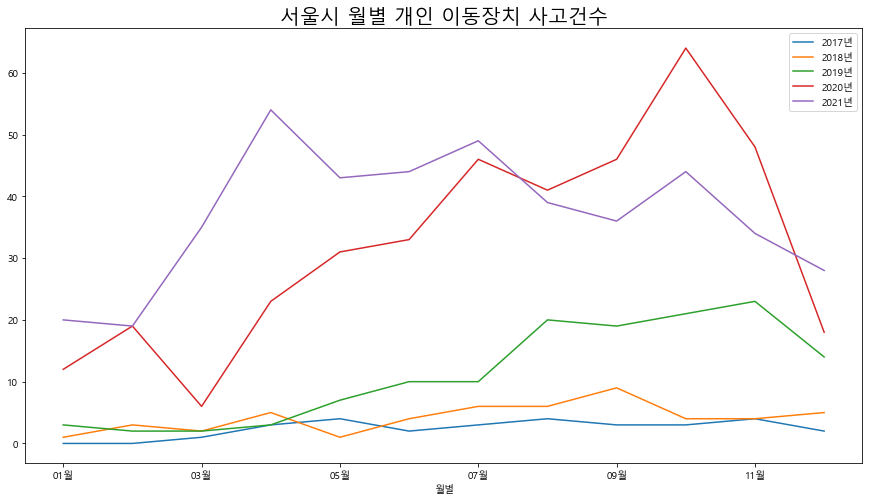

In [ ]:
month_total.plot(figsize=(15,8))

plt.title('서울시 월별 개인 이동장치 사고건수', fontsize=20) #그래프 제목 설정
plt.xlabel = '월별' #x축 이름 설정
plt.ylabel = '사고건수' #y축 이름 설정


**서울시 월별 사고건수 시각화 분석**
- 의도 : 2017~2021 년도 의 서울시내 전동킥보드 사고건수를 월별로 파악할수있다.


- 해석 : 최근 2년 2020 - 2021 년도의 사고 건수가 다른 년도에 비하여 많은것을 확인 할수 있고, 10월달의 사고건수가 대체적으로 높다는 것을 확인할 수 있다.

#### 서울시 요일별 개인형이동장치 사고 현황 시각화

In [ ]:
# 데이터 확인
day_total

**컬럼명 재설정 및 '요일' 컬럼을 인덱스로 재설정**

In [ ]:
day_total.rename(columns = {'Unnamed: 0': '요일'}, inplace=True)
day_total = day_total.set_index('요일')

**누적 막대 그래프를 이용하여 각 년도별 요일별 그래프 그리기**

<AxesSubplot:xlabel='요일'>

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '월'),
  Text(1, 0, '화'),
  Text(2, 0, '수'),
  Text(3, 0, '목'),
  Text(4, 0, '금'),
  Text(5, 0, '토'),
  Text(6, 0, '일')])

Text(0.5, 1.0, '서울시 요일별 개인 이동장치 사고건수')

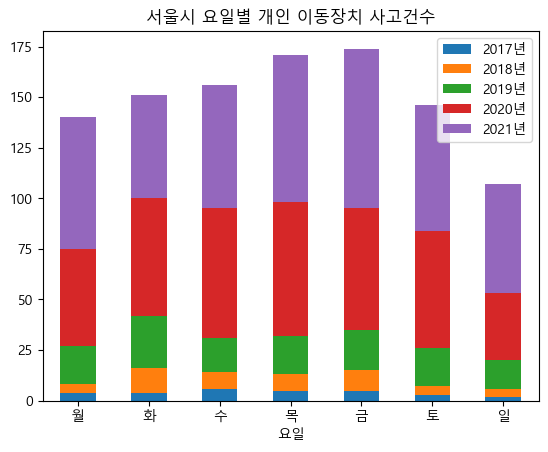

In [ ]:
day_total.plot( kind='bar', stacked=True)

plt.xlabel = ('요일') #x축 이름 설정
plt.ylabel = ('사고건수') #y축 이름 설정
plt.xticks(rotation=0) # x축의 요소값 회전을 0으로 지정

plt.title('서울시 요일별 개인 이동장치 사고건수') #그래프 제목 지정

**서울시 요일별 사고건수 시각화 분석**
- 의도 : 2017~2021 년도 의 서울시내 전동킥보드 사고건수를 요일별로 파악할수있다.


- 해석 : 최근 2년 2020 - 2021 년도의 사고 건수가 다른 년도에 비하여 많은것을 확인 할수 있고, 목~금의 사고건수가 대체적으로 높다는 것을 확인할 수 있다.

#### 서울시 시간별 개인형이동장치 사고 현황 시각화

In [ ]:
# 데이터 확인
year_total

**컬럼명 및 '시간' 컬럼을 인덱스로 재설정**

In [ ]:
year_total.rename(columns = {'Unnamed: 0': '시간'}, inplace=True)
year_total = year_total.set_index('시간')

**히트맵을 이용하여 각 년도별 따른 시간별 그래프 그리기**

<AxesSubplot:ylabel='시간'>

Text(0.5, 1.0, '서울시 시간별 개인 이동장치 사고건수')

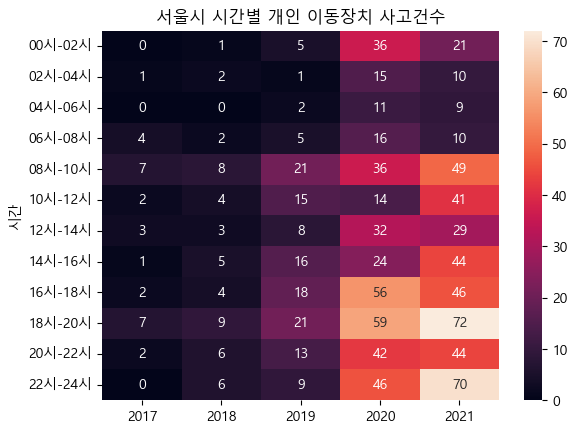

In [ ]:
sns.heatmap(year_total, vmin=0, vmax=year_total.max().max(),annot=True, fmt='.0f')#건수 표시, 소수점 없이 출력
plt.title('서울시 시간별 개인 이동장치 사고건수')

**서울시 시간별 사고건수 시각화 분석**
- 의도 : 2017~2021 년도 의 서울시내 전동킥보드 사고건수를 시간별로 파악할수있다.


- 해석 : 대체적으로 주간보다는 야간(18 ~ 24)의 사고건수가 많은 것을 확인 할수 있다.

#### 서울시  개인형이동장치 보호구 착용 여부에 따른 사고 현황 시각화

In [ ]:
# 데이터 확인
result

**컬럼명 및 '착용/미착용' 컬럼을 인덱스로 재설정**

In [ ]:
result.rename(columns = {'Unnamed: 0': '착용/미착용'}, inplace=True)
result = result.set_index('착용/미착용')

**보호구 착용/미착용 여부에 따른 막대 그래프 그리기**

<AxesSubplot:xlabel='착용/미착용'>

Text(0.5, 1.0, '서울시 개인형 이동장치 보호구 착용 현황에 따른 사고건수')

(array([0, 1]), [Text(0, 0, '사망자'), Text(1, 0, '부상자')])

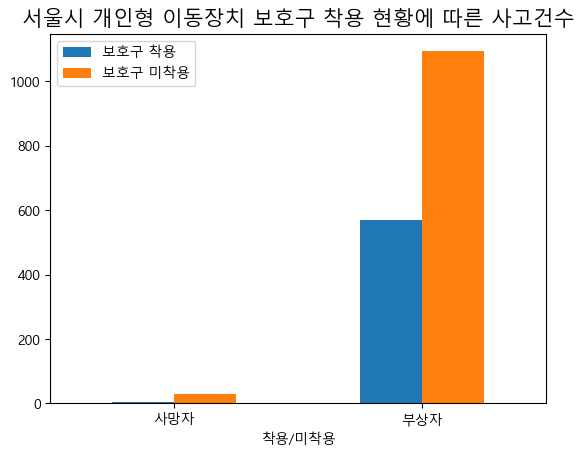

In [ ]:
result.plot.bar()

plt.title('서울시 개인형 이동장치 보호구 착용 현황에 따른 사고건수', fontsize=15) #그래프 제목 설정
plt.xlabel=('착용현황') #x축 이름 설정
plt.ylabel=('사고건수') #y축 이름 설정
plt.xticks(rotation=0) #x축의 요소값 회전 0으로 설정

**서울시 보호구 착용 현황에 따른 사고건수 시각화 분석**
- 의도 : 2017~2021 년도의 서울시의 전동킥보드 사고중 보호구 착용의 유무에 따른 부상자와 사망자의 수를 파악할 수 있다.


- 해석 : 보호구를 착용한 사고의 경우가 미착용한 사고에 비하여 부상자와 사망자의 수가 적다는 것을 알 수 있다.

#### 서울시 구별 개인형 이동장치 사고 현황

In [ ]:
# 데이터 확인
PM_total

,Unnamed: 0,자치구별,PM총합
0,3,종로구,17.0
1,9,용산구,13.0
2,12,성동구,40.0
3,15,동대문구,34.0
4,18,성북구,14.0
5,21,도봉구,14.0
6,24,은평구,26.0
7,27,서대문구,24.0
8,30,마포구,73.0
9,36,구로구,30.0


**컬럼명 및 '자치구별' 컬럼을 인덱스로 재설정**

In [ ]:
PM_total = PM_total[['자치구별','PM총합']]
PM_total = PM_total.set_index('자치구별')

**자치구별 종합 사고건수에 관한 파이차트 그리기**

([<matplotlib.patches.Wedge at 0x1708f95b5e0>,
 [Text(-0.1742446978413181, 3.2953966051560757, '종로구'),
  Text(-0.48024791658685134, 3.264867828659223, '용산구'),
  Text(-1.0090223266985865, 3.141953841835327, '성동구'),
  Text(-1.6986000761926319, 2.8292680645634105, '동대문구'),
  Text(-2.1001788855823604, 2.545436828631588, '성북구'),
  Text(-2.313427188945771, 2.353307171077858, '도봉구'),
  Text(-2.5873345193262978, 2.048340812731748, '은평구'),
  Text(-2.8731411108312583, 1.623286837638784, '서대문구'),
  Text(-3.2255230051771857, 0.697137965594143, '마포구'),
  Text(-3.281054608093564, -0.35310148499828015, '구로구'),
  Text(-3.1340204944322556, -1.0333999905547704, '영등포구'),
  Text(-2.826625534211157, -1.7029938606305928, '동작구'),
  Text(-2.3712079035417353, -2.295075832773551, '관악구'),
  Text(-0.04101678338157167, -3.299745084621088, '강남구'),
  Text(2.1859420340295035, -2.4721766570904595, '강동구'),
  Text(2.9410195011740936, -1.4967980136657342, '송파구'),
  Text(3.2870673659946115, 0.2918700591243441, '서초구'),
  T

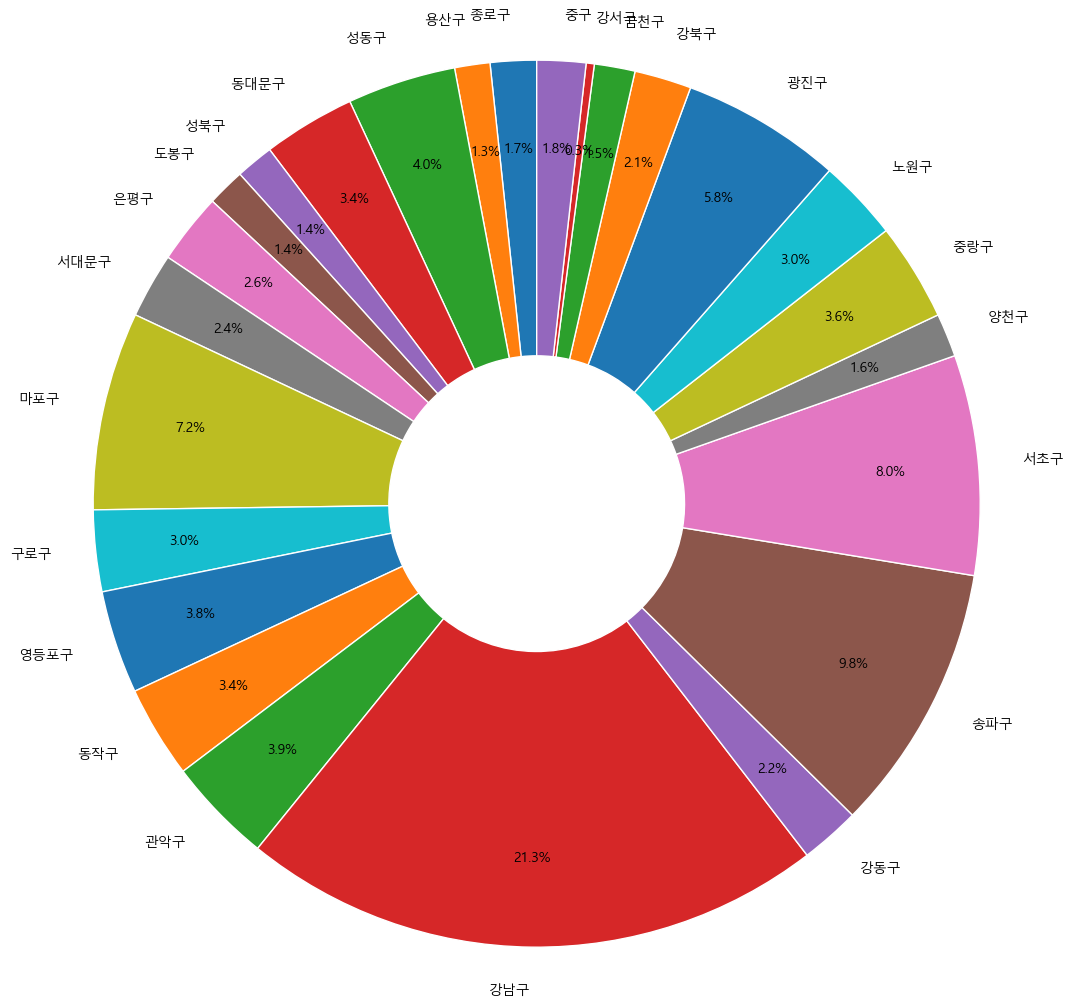

In [ ]:
#각 자치구 지정을 위한 라벨 생성
labels = list(PM_total.index)

#파이차트 생성 시 웨지의 속성을 지정
wedgeprops={'width': 2, 'edgecolor': 'w', 'linewidth': 1} #웨지 넓이:2, 엣지컬러:하얀, 선굵기:1로 설정

plt.pie(PM_total['PM총합'], labels=labels, radius=3, autopct = '%.1f%%', startangle=90, wedgeprops=wedgeprops,pctdistance=0.8)
#반지름 3, 소숫점 첫째 자리까지, 시작각도 90도, 웨지그룹 설정, 값표시 위치 설정
plt.show()

- 의도 : 2017~2021 년도 의 서울시내 전동킥보드 사고건수를 서울시의 구별로 파악할수있다.

- 해석 : 서울의 강남(강남구, 서초구, 송파구)지역의 사고건수가 다른 지역에 비해 많다는 것을 알 수 있다.

## 2. 서울시 구별 전동킥보드 사고현황 분석 (2018-2021)



**활용 데이터 서울시 전동킥보드 견인 현황(2017-2021)**<br>
>• 성별 - 구별 분류, 년도 총합, 성별 분류, pm 추출 ,웹 크롤링을 통해 데이터수집<br>
• 날씨별 - 구별 분류, 년도 총합, 날씨 분류, pm 추출,웹 크롤링을 통해 데이터수집<br>
• 연령별 - 구별 분류, 년도 총합, 연령별 분류, pm추출<br>
• 위반유형별 - 구별 분류, 년도 총합, 위반유형별 분류, pm추출<br>
• 날씨 api 사용으로 실시간 날씨 데이터 분석


#### 데이터 전처리 개요
>- 웹크롤링을통한 데이터 추출
>- 크롬 드라이버 객체 생성
> - 웹페이지 로드, 25개의 구의 엑셀파일 다운로드(기상상태,성별)
> - 결측치 확인및 제거 
> - 열 재구성
> - boxplot을 이용한 시각화

#### 크롬 드라이버 객체 생성

In [ ]:
driver = webdriver.Chrome(service=service)

#### 웹페이지 로드

In [ ]:
driver.implicitly_wait(3)

In [ ]:
# 기상상태별 교통사고
url = 'https://tmacs.kotsa.or.kr/web/TG/TG200/TG2100S/Tg2102.jsp?mid=S1191'
driver.get(url)

#### 구 이름 찾기

In [ ]:
url = 'https://tmacs.kotsa.or.kr/web/TG/TG200/TG2100S/Tg2102.jsp?mid=S1191'
driver.get(url)

sido = driver.find_element(By.ID, "sido")
sido.send_keys('서울특별시')

jijace = driver.find_element(By.ID, "jijace")
jijace_list = jijace.find_elements(By.TAG_NAME, 'option')

In [ ]:
gu_values = [gu.get_attribute('innerText') for gu in jijace_list]
gu_values = gu_values[1:]
gu_values

In [ ]:
gu_values[0]

#### 25개 구 엑셀파일 다운로드

In [ ]:
def download_xls(year, gu):
    # 년도, 시군구 선택
    start_year = driver.find_element(By.ID, "std_year")
    start_year.send_keys(year)
    end_year = driver.find_element(By.ID, "end_year")
    end_year.send_keys(year)
    sido = driver.find_element(By.ID, "sido")
    sido.send_keys('서울특별시')
    jijace = driver.find_element(By.ID, "jijace")
    jijace.send_keys(gu)
    time.sleep(1)
    
    # 상세검색 설정
    xpath = '//*[@id="content"]/div[2]/div[1]/div[2]/a[2]'
    driver.find_element(By.XPATH, xpath).click()
    time.sleep(1)
    xpath = '//*[@id="content"]/div[2]/div[1]/div[1]/div/dl[5]/dd/span[1]/input'
    driver.find_element(By.XPATH, xpath).click()
    time.sleep(1)
    xpath = '//*[@id="content"]/div[2]/div[1]/div[2]/a[2]'
    driver.find_element(By.XPATH, xpath).click()
    time.sleep(1)
    
    # 조회 클릭
    xpath = '//*[@id="content"]/div[2]/div[1]/div[2]/a[1]'
    driver.find_element(By.XPATH, xpath).click()
    time.sleep(5)

    # 엑셀 저장 버튼 클릭
    xpath = '//*[@id="content"]/div[2]/div[2]/div[2]/a[2]'
    driver.find_element(By.XPATH, xpath).click()
    time.sleep(1)

In [ ]:
url = 'https://tmacs.kotsa.or.kr/web/TG/TG200/TG2100S/Tg2102.jsp?mid=S1191'
driver.get(url)
download_xls('2018', gu_values[1])

## 기상상황별 교통사고

#### 엑셀 다운 크롤링

In [ ]:
url = 'https://tmacs.kotsa.or.kr/web/TG/TG200/TG2100S/Tg2102.jsp?mid=S1191'#2018년도 자료
driver.get(url)


for gu in tqdm(gu_values):
     download_xls('2018', gu)

In [ ]:
url = 'https://tmacs.kotsa.or.kr/web/TG/TG200/TG2100S/Tg2102.jsp?mid=S1191'#2019년도자료
driver.get(url)


for gu in tqdm(gu_values):
     download_xls('2019', gu)

In [ ]:
url = 'https://tmacs.kotsa.or.kr/web/TG/TG200/TG2100S/Tg2102.jsp?mid=S1191'#2020년도자료
driver.get(url)


for gu in tqdm(gu_values):
     download_xls('2020', gu)

In [ ]:
url = 'https://tmacs.kotsa.or.kr/web/TG/TG200/TG2100S/Tg2102.jsp?mid=S1191'#2021년도자료
driver.get(url)


for gu in tqdm(gu_values):
     download_xls('2021', gu)

#### 엑셀 파일 읽어오기

In [ ]:
len(glob('./weekly_project/2018/교통사고 지표 현황*.xls'))

25

In [ ]:
fnames = glob('./weekly_project/2018/교통사고 지표 현황*.xls')

In [ ]:
weather = pd.read_excel(fnames[0], header=2, engine='openpyxl')
weather

C:\Users\rhals\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,여객(건),화물(건),Unnamed: 8,Unnamed: 9
0,서울,강동구,맑음,승용,792,0,0,0,7,0.88
1,서울,강동구,맑음,승합,98,0,0,0,0,0.00
2,서울,강동구,맑음,화물,118,0,0,8,1,0.85
3,서울,강동구,맑음,특수,7,0,0,0,0,0.00
4,서울,강동구,맑음,이륜,83,0,0,0,0,0.00
5,서울,강동구,맑음,원동기,22,0,0,0,0,0.00
6,서울,강동구,맑음,자전거,60,0,0,0,0,0.00
7,서울,강동구,맑음,건설기계,13,0,0,0,2,15.38
8,서울,강동구,맑음,개인형이동수단(PM),2,0,0,0,0,0.00
9,서울,강동구,맑음,기타,44,0,0,0,0,0.00


#### 25개 구 년도별로 합치기

In [ ]:
for i in range(2018, 2022):
    fnames = glob(f'./weekly_project/{str(i)}/교통사고 지표 현황*.xls')
    lst = []
    for fname in fnames:
        lst.append(pd.read_excel(fname, header=2, engine='openpyxl'))
    globals()['weather_{}'.format(i)] = pd.concat(lst)

C:\Users\rhals\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\rhals\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\rhals\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\rhals\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\rhals\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains

C:\Users\rhals\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\rhals\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\rhals\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\rhals\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\rhals\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains

C:\Users\rhals\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


#### 칼럼명을 다시 지정

In [ ]:
for i in range(2018,2022):
    globals()['weather_{}'.format(i)]['year'] = np.NaN
    globals()['weather_{}'.format(i)]['year'].fillna(str(i), inplace=True)
    globals()['weather_{}'.format(i)].drop(['Unnamed: 0'], axis=1, inplace=True) 
    globals()['weather_{}'.format(i)].rename(columns = {'Unnamed: 1':'구', 
                               'Unnamed: 2':'기상상태',
                               'Unnamed: 3':'차량종류',
                              'Unnamed: 4':'발생건수',
                              'Unnamed: 5':'대형사고',
                              '여객(건)':'중대사고-여객',
                              '화물(건)':'중대사고-화물',
                              'Unnamed: 8':'사망자수',
                              'Unnamed: 9':'치사율'}, inplace=True)

In [ ]:
weather_data = pd.concat([weather_2018, weather_2019, weather_2020, weather_2021])
weather_data

,구,기상상태,차량종류,발생건수,대형사고,중대사고-여객,중대사고-화물,사망자수,치사율,year
0,강동구,맑음,승용,792,0,0,0,7,0.88,2018
1,강동구,맑음,승합,98,0,0,0,0,0.00,2018
2,강동구,맑음,화물,118,0,0,8,1,0.85,2018
3,강동구,맑음,특수,7,0,0,0,0,0.00,2018
4,강동구,맑음,이륜,83,0,0,0,0,0.00,2018
...,...,...,...,...,...,...,...,...,...,...
40,강남구,기타,자전거,3,0,0,0,0,0.00,2021
41,강남구,기타,개인형이동수단(PM),5,0,0,0,0,0.00,2021
42,강남구,기타,기타,9,0,0,0,0,0.00,2021
43,NaN,NaN,소계,149,0,0,0,0,NaN,2021


### 데이터 정보확인

In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3475 entries, 0 to 44
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   구        2884 non-null   object 
 1   기상상태     2884 non-null   object 
 2   차량종류     3375 non-null   object 
 3   발생건수     3475 non-null   int64  
 4   대형사고     3475 non-null   int64  
 5   중대사고-여객  3475 non-null   int64  
 6   중대사고-화물  3475 non-null   int64  
 7   사망자수     3475 non-null   int64  
 8   치사율      2884 non-null   float64
 9   year     3475 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 298.6+ KB


**결측치제거**

In [ ]:
weather_data.dropna(subset=['기상상태'], inplace=True)
weather_data

,구,기상상태,차량종류,발생건수,대형사고,중대사고-여객,중대사고-화물,사망자수,치사율,year
0,강동구,맑음,승용,792,0,0,0,7,0.88,2018
1,강동구,맑음,승합,98,0,0,0,0,0.00,2018
2,강동구,맑음,화물,118,0,0,8,1,0.85,2018
3,강동구,맑음,특수,7,0,0,0,0,0.00,2018
4,강동구,맑음,이륜,83,0,0,0,0,0.00,2018
...,...,...,...,...,...,...,...,...,...,...
38,강남구,기타,이륜,17,0,0,0,0,0.00,2021
39,강남구,기타,원동기,1,0,0,0,0,0.00,2021
40,강남구,기타,자전거,3,0,0,0,0,0.00,2021
41,강남구,기타,개인형이동수단(PM),5,0,0,0,0,0.00,2021


In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2884 entries, 0 to 42
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   구        2884 non-null   object 
 1   기상상태     2884 non-null   object 
 2   차량종류     2884 non-null   object 
 3   발생건수     2884 non-null   int64  
 4   대형사고     2884 non-null   int64  
 5   중대사고-여객  2884 non-null   int64  
 6   중대사고-화물  2884 non-null   int64  
 7   사망자수     2884 non-null   int64  
 8   치사율      2884 non-null   float64
 9   year     2884 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 247.8+ KB


In [ ]:
len(weather_data.구.unique())# 구 갯수 확인

25

In [ ]:
weather_data.기상상태.unique() # 기상상태 용어 확인

array(['맑음', '흐림', '비', '눈', '기타', '안개'], dtype=object)

In [ ]:
weather_data.차량종류.unique()# 차량종류 확인

array(['승용', '승합', '화물', '특수', '이륜', '원동기', '자전거', '건설기계', '개인형이동수단(PM)',
       '기타', '사륜오토바이(AVT)', '농기계'], dtype=object)

In [ ]:
weather_data.reset_index(drop=True, inplace=True) #인덱스 재설정

In [ ]:
weather_data.columns

Index(['구', '기상상태', '차량종류', '발생건수', '대형사고', '중대사고-여객', '중대사고-화물', '사망자수',
       '치사율', 'year'],
      dtype='object')

In [ ]:
weather_data = weather_data[['year','구', '기상상태', '차량종류', '발생건수', '대형사고', '중대사고-여객', '중대사고-화물', '사망자수',
       '치사율']]
weather_data

,year,구,기상상태,차량종류,발생건수,대형사고,중대사고-여객,중대사고-화물,사망자수,치사율
0,2018,강동구,맑음,승용,792,0,0,0,7,0.88
1,2018,강동구,맑음,승합,98,0,0,0,0,0.00
2,2018,강동구,맑음,화물,118,0,0,8,1,0.85
3,2018,강동구,맑음,특수,7,0,0,0,0,0.00
4,2018,강동구,맑음,이륜,83,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...
2879,2021,강남구,기타,이륜,17,0,0,0,0,0.00
2880,2021,강남구,기타,원동기,1,0,0,0,0,0.00
2881,2021,강남구,기타,자전거,3,0,0,0,0,0.00
2882,2021,강남구,기타,개인형이동수단(PM),5,0,0,0,0,0.00


#### csv 파일로 내보내기

In [ ]:
weather_data.to_csv('./data/weather_data.csv', encoding='cp949')

## 성별 데이터

#### 엑셀 다운로드 크롤링(2018~2021)

In [ ]:
url = 'https://tmacs.kotsa.or.kr/web/TG/TG200/TG2100S/Tg2102.jsp?mid=S1180'
driver.get(url)
download_xls('2018', gu_values[1])

In [ ]:
#2018
url = 'https://tmacs.kotsa.or.kr/web/TG/TG200/TG2100S/Tg2102.jsp?mid=S1180'
driver.get(url)


for gu in tqdm(gu_values):
     download_xls('2018', gu)

In [ ]:
#2019
url = 'https://tmacs.kotsa.or.kr/web/TG/TG200/TG2100S/Tg2102.jsp?mid=S1180'
driver.get(url)

for gu in tqdm(gu_values):
     download_xls('2019', gu)

In [ ]:
#2020
url = 'https://tmacs.kotsa.or.kr/web/TG/TG200/TG2100S/Tg2102.jsp?mid=S1180'
driver.get(url)

for gu in tqdm(gu_values):
     download_xls('2020', gu)

In [ ]:
#2021
url = 'https://tmacs.kotsa.or.kr/web/TG/TG200/TG2100S/Tg2102.jsp?mid=S1180'
driver.get(url)


for gu in tqdm(gu_values):
     download_xls('2021', gu)

#### 엑셀 파일 읽어오기

In [ ]:
len(glob('./sex/2018/교통사고 지표 현황*.xls'))

In [ ]:
sex = pd.read_excel(fnames[0], header=2, engine='openpyxl')
sex

#### 25개 구 년도별로 합치기

In [ ]:
for i in range(2018, 2022):
    fnames = glob(f'./sex/{str(i)}/교통사고 지표 현황*.xls')
    lst = []
    for fname in fnames:
        lst.append(pd.read_excel(fname, header=2, engine='openpyxl'))
    globals()['sex_{}'.format(i)] = pd.concat(lst)

In [ ]:
for i in range(2018,2022):
    globals()['sex_{}'.format(i)]['year'] = np.NaN
    globals()['sex_{}'.format(i)]['year'].fillna(str(i), inplace=True)
    globals()['sex_{}'.format(i)].drop(['Unnamed: 0'], axis=1, inplace=True) 
    globals()['sex_{}'.format(i)].rename(columns = {'Unnamed: 1':'구', 
                               'Unnamed: 2':'성별',
                               'Unnamed: 3':'차량종류',
                              'Unnamed: 4':'발생건수',
                              'Unnamed: 5':'대형사고',
                              '여객(건)':'중대사고-여객',
                              '화물(건)':'중대사고-화물',
                              'Unnamed: 8':'사망자수',
                              'Unnamed: 9':'치사율'}, inplace=True)

In [ ]:
sex_data = pd.concat([sex_2018, sex_2019, sex_2020, sex_2021])
sex_data

**데이터확인**

In [ ]:
sex_data.info()

**결측치제거**

In [ ]:
sex_data.dropna(subset=['성별'], inplace=True)
sex_data

In [ ]:
sex_data.info()

In [ ]:
len(sex_data.구.unique())

In [ ]:
sex_data.성별.unique()

In [ ]:
sex_data.차량종류.unique()

In [ ]:
sex_data.columns

In [ ]:
sex_data.reset_index(drop=True, inplace=True)

In [ ]:
sex_data = sex_data[['year','구', '성별', '차량종류', '발생건수', '대형사고', '중대사고-여객', '중대사고-화물', '사망자수',
       '치사율']]
sex_data

#### csv 파일로 내보내기

In [ ]:
sex_data.to_csv('./data/sex_data.csv', encoding='cp949')

### taas 차종별 교통사고 데이터 파일 불러오기

**위반유형별**

In [ ]:
acd1 = pd.read_csv('./data/위반유형별교통사고유형.csv', index_col=0, encoding = 'utf-8')
acd1

,년도,시도,지자체,위반유형,차량종류,발생건수,대형사고,중대사고-여객,중대사고-화물,사망자수,치사율(%)
0,2018,서울,강동구,중앙선침범,승용,22.0,0.0,0,0,0.0,0.0
1,2018,서울,강동구,중앙선침범,승합,1.0,0.0,0,0,0.0,0.0
2,2018,서울,강동구,중앙선침범,화물,4.0,0.0,0,0,0.0,0.0
3,2018,서울,강동구,중앙선침범,이륜,3.0,0.0,0,0,0.0,0.0
4,2018,서울,강동구,중앙선침범,자전거,4.0,0.0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5300,2021,서울,강남구,차로위반,승용,40.0,0.0,0,0,0.0,0.0
5301,2021,서울,강남구,차로위반,승합,4.0,0.0,0,0,0.0,0.0
5302,2021,서울,강남구,차로위반,특수,1.0,0.0,0,0,0.0,0.0
5303,2021,서울,강남구,차로위반,이륜,5.0,0.0,0,0,0.0,0.0


**연령별**

In [ ]:
acd2 = pd.read_csv('./data/연령별교통사고유형.csv', index_col=0, encoding = 'utf-8')
acd2

,Unnamed: 0,년도,시도,지자체,연령대,차량종류,발생건수,대형사고,중대사고-여객(건),중대사고-화물(건),사망자수,치사율(%)
0,1,2018,서울,강남구,20대 미만,승용,9,0,0,0,0,0.00
1,2,2018,서울,강남구,20대 미만,이륜,10,0,0,0,0,0.00
2,3,2018,서울,강남구,20대 미만,원동기,1,0,0,0,0,0.00
3,4,2018,서울,강남구,20대 미만,자전거,15,0,0,0,0,0.00
4,6,2018,서울,강남구,20대,승용,321,0,0,0,1,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...
4540,47,2021,서울,노원구,60대 이상,건설기계,4,0,0,0,0,0.00
4541,48,2021,서울,노원구,60대 이상,기타,2,0,0,0,0,0.00
4542,50,2021,서울,노원구,알수없음,이륜,1,0,0,0,0,0.00
4543,51,2021,서울,노원구,알수없음,자전거,3,0,0,0,0,0.00


**성별유형별**

In [ ]:
acd3 = pd.read_csv('./data/sex_data.csv', index_col=0, encoding = 'cp949')
acd3

,year,구,성별,차량종류,발생건수,대형사고,중대사고-여객,중대사고-화물,사망자수,치사율
0,2018,강동구,남성,승용,683,0,0,0,5,0.73
1,2018,강동구,남성,승합,106,0,0,0,1,0.94
2,2018,강동구,남성,화물,134,0,0,9,1,0.75
3,2018,강동구,남성,특수,7,0,0,0,0,0.00
4,2018,강동구,남성,이륜,90,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...
1868,2021,강남구,알수없음,이륜,1,0,0,0,0,0.00
1869,2021,강남구,알수없음,원동기,1,0,0,0,0,0.00
1870,2021,강남구,알수없음,자전거,1,0,0,0,0,0.00
1871,2021,강남구,알수없음,개인형이동수단(PM),1,0,0,0,0,0.00


**기상상태별**

In [ ]:
acd4 = pd.read_csv('./data/weather_data.csv', index_col=0, encoding = 'cp949')
acd4

,year,구,기상상태,차량종류,발생건수,대형사고,중대사고-여객,중대사고-화물,사망자수,치사율
0,2018,강동구,맑음,승용,792,0,0,0,7,0.88
1,2018,강동구,맑음,승합,98,0,0,0,0,0.00
2,2018,강동구,맑음,화물,118,0,0,8,1,0.85
3,2018,강동구,맑음,특수,7,0,0,0,0,0.00
4,2018,강동구,맑음,이륜,83,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...
2879,2021,강남구,기타,이륜,17,0,0,0,0,0.00
2880,2021,강남구,기타,원동기,1,0,0,0,0,0.00
2881,2021,강남구,기타,자전거,3,0,0,0,0,0.00
2882,2021,강남구,기타,개인형이동수단(PM),5,0,0,0,0,0.00


#### 열 이름 일치시키기

In [ ]:
acd3.rename(columns = {'year':'년도', '구':'지자체'}, inplace = True)
acd4.rename(columns = {'year':'년도', '구':'지자체'}, inplace = True)

### 위반유형별 사고 데이터

In [ ]:
acd1 = acd1[acd1['차량종류'] == '개인형이동수단(PM)']
acd1 = acd1[['년도', '지자체', '위반유형', '발생건수', '사망자수']]
acd1

,년도,지자체,위반유형,발생건수,사망자수
36,2018,강동구,안전운전불이행,2.0,0.0
69,2018,동대문구,신호위반,2.0,0.0
78,2018,동대문구,안전거리미확보,1.0,0.0
94,2018,동대문구,안전운전불이행,2.0,0.0
145,2018,동작구,안전운전불이행,1.0,0.0
...,...,...,...,...,...
5213,2021,도봉구,신호위반,2.0,0.0
5229,2021,도봉구,안전운전불이행,1.0,0.0
5255,2021,강남구,중앙선침범,2.0,0.0
5262,2021,강남구,신호위반,6.0,0.0


**데이터확인**

In [ ]:
types = acd1.위반유형.unique()
len(types)

9

In [ ]:
gu = acd1.지자체.unique()
len(gu)

25

In [ ]:
acd1.columns

Index(['년도', '지자체', '위반유형', '발생건수', '사망자수'], dtype='object')

#### 구별 유형별 전체년도 사고건수 구하기

In [ ]:
acd1_df = pd.DataFrame([], columns=['지자체', '위반유형', '발생건수'])
i = 0
for t in types:
    for g in gu:
        acd1_df.loc[i] = [g, t, acd1[(acd1['위반유형'] == t) & (acd1['지자체'] == g)].발생건수.sum()]
        i += 1

In [ ]:
acd1_df

,지자체,위반유형,발생건수
0,강동구,안전운전불이행,16.0
1,동대문구,안전운전불이행,19.0
2,동작구,안전운전불이행,20.0
3,마포구,안전운전불이행,53.0
4,서초구,안전운전불이행,40.0
...,...,...,...
220,서대문구,직진우회전진행방해,0.0
221,송파구,직진우회전진행방해,0.0
222,양천구,직진우회전진행방해,0.0
223,중구,직진우회전진행방해,0.0


#### csv파일로 내보내기

In [ ]:
acd1_df.to_csv('./data/위반유형별 교통사고 전처리 데이터.csv', encoding='cp949')

### 연령대별 사고 데이터

In [ ]:
acd2.drop(acd2.columns[0], axis = 1, inplace = True)
acd2 = acd2[acd2['차량종류'] == '개인형이동수단(PM)']
acd2 = acd2[['년도', '지자체', '연령대', '발생건수', '사망자수']]
acd2

,년도,지자체,연령대,발생건수,사망자수
12,2018,강남구,20대,2,0
21,2018,강남구,30대,1,0
86,2018,도봉구,60대 이상,1,0
101,2018,동대문구,20대,2,0
116,2018,동대문구,40대,3,0
...,...,...,...,...,...
4473,2021,금천구,30대,1,0
4480,2021,금천구,40대,1,0
4503,2021,노원구,20대 미만,7,1
4510,2021,노원구,20대,9,0


In [ ]:
types = acd2.연령대.unique()
len(types)

7

#### 구별 유형별 전체년도 사고건수 구하기

In [ ]:
acd2_df = pd.DataFrame([], columns=['지자체', '연령대', '발생건수'])
i = 0
for t in types:
    for g in gu:
        acd2_df.loc[i] = [g, t, acd2[(acd2['연령대'] == t) & (acd2['지자체'] == g)].발생건수.sum()]
        i += 1

In [ ]:
acd2_df

,지자체,연령대,발생건수
0,강동구,20대,7
1,동대문구,20대,14
2,동작구,20대,22
3,마포구,20대,42
4,서초구,20대,35
...,...,...,...
170,서대문구,알수없음,0
171,송파구,알수없음,0
172,양천구,알수없음,0
173,중구,알수없음,0


#### csv파일로 내보내기

In [ ]:
acd2_df.to_csv('./data/연령별 교통사고 전처리 데이터.csv', encoding='cp949')

### 성별 사고 데이터

In [ ]:
acd3 = acd3[acd3['차량종류'] == '개인형이동수단(PM)']
acd3 = acd3[['년도', '지자체', '성별', '발생건수', '사망자수']]
acd3

,년도,지자체,성별,발생건수,사망자수
8,2018,강동구,남성,2,0
26,2018,동대문구,남성,3,0
34,2018,동대문구,여성,2,0
47,2018,동작구,남성,1,0
63,2018,마포구,남성,3,0
...,...,...,...,...,...
1839,2021,도봉구,남성,1,0
1845,2021,도봉구,여성,2,0
1857,2021,강남구,남성,57,0
1865,2021,강남구,여성,23,0


In [ ]:
types = acd3.성별.unique()
len(types)

3

#### 구별 유형별 전체년도 사고건수 구하기

In [ ]:
acd3_df = pd.DataFrame([], columns=['지자체', '성별', '발생건수'])
i = 0
for t in types:
    for g in gu:
        acd3_df.loc[i] = [g, t, acd3[(acd3['성별'] == t) & (acd3['지자체'] == g)].발생건수.sum()]
        i += 1

In [ ]:
acd3_df

,지자체,성별,발생건수
0,강동구,남성,16
1,동대문구,남성,26
2,동작구,남성,29
3,마포구,남성,52
4,서초구,남성,60
...,...,...,...
70,서대문구,알수없음,0
71,송파구,알수없음,0
72,양천구,알수없음,0
73,중구,알수없음,0


#### csv파일로 내보내기

In [ ]:
acd3_df.to_csv('./data/성별 교통사고 전처리 데이터.csv', encoding='cp949')

### 기상상태별 사고 데이터

In [ ]:
acd4 = acd4[acd4['차량종류'] == '개인형이동수단(PM)']
acd4 = acd4[['년도', '지자체', '기상상태', '발생건수', '사망자수']]
acd4

,년도,지자체,기상상태,발생건수,사망자수
8,2018,강동구,맑음,2,0
39,2018,동대문구,맑음,5,0
72,2018,동작구,맑음,1,0
102,2018,마포구,맑음,4,0
154,2018,서초구,맑음,1,0
...,...,...,...,...,...
2823,2021,도봉구,맑음,3,0
2854,2021,강남구,맑음,71,0
2862,2021,강남구,흐림,3,0
2870,2021,강남구,비,2,0


In [ ]:
types = acd4.기상상태.unique()
len(types)

5

#### 구별 유형별 전체년도 사고건수 구하기

In [ ]:
acd4_df = pd.DataFrame([], columns=['지자체', '기상상태', '발생건수'])
i = 0
for t in types:
    for g in gu:
        acd4_df.loc[i] = [g, t, acd4[(acd4['기상상태'] == t) & (acd4['지자체'] == g)].발생건수.sum()]
        i += 1

In [ ]:
acd4_df

,지자체,기상상태,발생건수
0,강동구,맑음,21
1,동대문구,맑음,29
2,동작구,맑음,33
3,마포구,맑음,66
4,서초구,맑음,70
...,...,...,...
120,서대문구,눈,0
121,송파구,눈,0
122,양천구,눈,0
123,중구,눈,0


#### csv파일로 내보내기

In [ ]:
acd4_df.to_csv('./data/기상상태별 교통사고 전처리 데이터.csv', encoding='cp949')

### 서울시 구별 사고현황 시각화

#### 성별

In [ ]:
sex_data = pd.read_csv('./data/성별 교통사고 전처리 데이터.csv', index_col=0, encoding='cp949')
sex_data.head()

,지자체,성별,발생건수
0,강동구,남성,16
1,동대문구,남성,26
2,동작구,남성,29
3,마포구,남성,52
4,서초구,남성,60


In [ ]:
sex_df = sex_data.pivot_table(index='성별', values='발생건수', aggfunc='sum')
sex_df = sex_df.sort_values(by='발생건수', ascending=False)
sex_df

,발생건수
성별,
남성,737
여성,271
알수없음,8


**서울시 성별 사고건수 시각화**

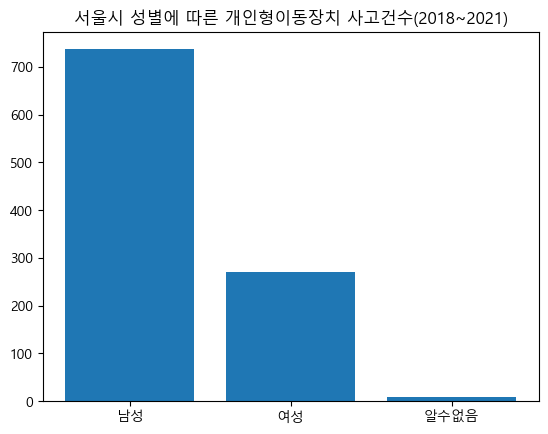

In [ ]:
plt.bar(sex_df.index, sex_df['발생건수'])
plt.title('서울시 성별에 따른 개인형이동장치 사고건수(2018~2021)')
plt.show()

**서울시 구별 성별 사고건수 시각화**

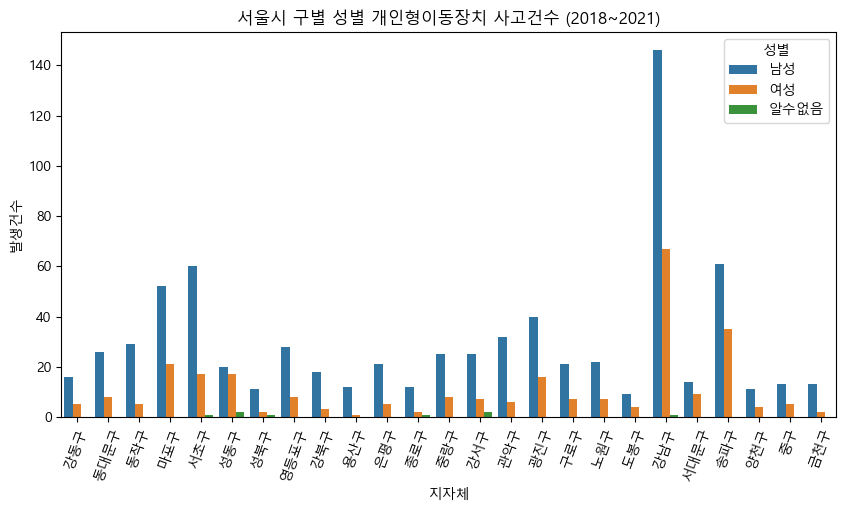

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=sex_data, x='지자체', y='발생건수', hue='성별')
plt.xticks(rotation=70)
plt.title('서울시 구별 성별 개인형이동장치 사고건수 (2018~2021)')
plt.show()**서울시 성별 사고건수 시각화**

**서울시 구별 성별 사고건수 시각화 분석**

- 의도 : 서울시의 구별 전동킥보드 사고건수 중 남 여를 구분하여 시각화 한것 대체적으로 어떠한 성별이 사고가 많이 났는지를 파악해볼수 있다.


- 해석 : 모든 서울시의 구에서 남자의 사고건수가 여자의 사고건수보다 많은것으로 확인되어, 남자가 전동킥보드를 이용할시에 사고가 날 확률이 높을수도 있지만, 남녀의 전동킥보드의 이용건수를 모르기 때문에 확답할수는 없다.


#### 기상상태별

In [ ]:
weather_data = pd.read_csv('./data/기상상태별 교통사고 전처리 데이터.csv', index_col=0, encoding='cp949')
weather_data.head()

,지자체,기상상태,발생건수
0,강동구,맑음,21
1,동대문구,맑음,29
2,동작구,맑음,33
3,마포구,맑음,66
4,서초구,맑음,70


In [ ]:
weather_df = weather_data.pivot_table(index='기상상태', values='발생건수', aggfunc='sum')
weather_df = weather_df.sort_values(by='발생건수', ascending=False)
weather_df

,발생건수
기상상태,
맑음,925
흐림,39
비,29
기타,22
눈,1


**서울시 성별 사고건수 시각화**

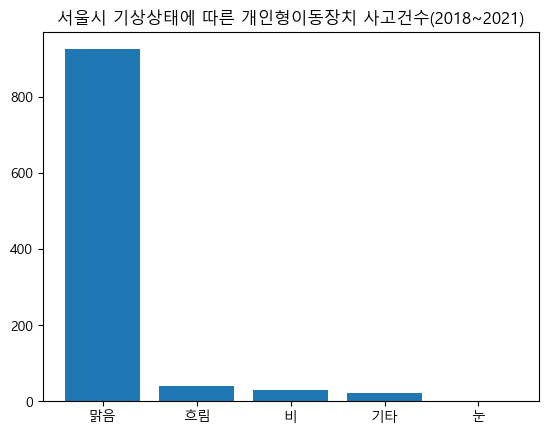

In [ ]:
**서울시 성별 사고건수 시각화**plt.bar(weather_df.index, weather_df['발생건수'])
plt.title('서울시 기상상태에 따른 개인형이동장치 사고건수(2018~2021)')
plt.show()

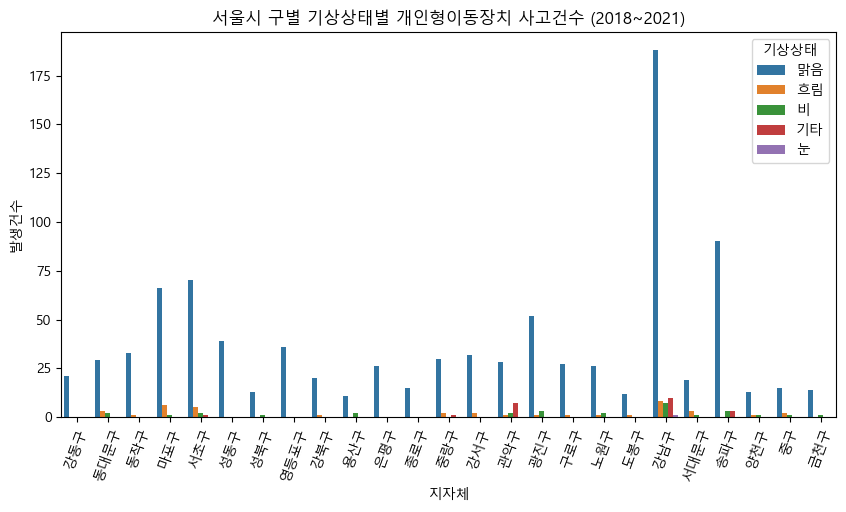

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=weather_data, x='지자체', y='발생건수', hue='기상상태')
plt.xticks(rotation=70)
plt.title('서울시 구별 기상상태별 개인형이동장치 사고건수 (2018~2021)')

plt.show()

**서울시 구별 기상상태별 사고건수 시각화 분석**

- 의도 : 서울시의 구별 전동킥보드 사고건수 중 기상상태(맑음,흐림,비,눈,기타)를 구분하여 시각화 한것 대체적으로 어떠한 기상상태에 사고가 많이 났는지를 파악해볼수 있다.


- 해석 : 모든 서울시의 구에서 맑은날씨에 사고건수가 압도적으로 많은것을 확인할수 있다. 이는 맑은날에 사고가 날 확률이 높을수 있다고 해석할수도 있다. 하지만 전동킥보드의 이용률을 확인할수 없어, 단순히 날씨 때문에 사고가 많은것이 아닌, 다른 기상상태 보다 맑은날의 전동킥보드 이용률이 높아 이러한 결과가 도출될수 있으므로 맑은날에 사고날 확율이 높다고 단정할수는 없다.


### 위반유형별

In [ ]:
type_data = pd.read_csv('./data/위반유형별 교통사고 전처리 데이터.csv', index_col=0, encoding='cp949')
type_data.head()

,지자체,위반유형,발생건수
0,강동구,안전운전불이행,16.0
1,동대문구,안전운전불이행,19.0
2,동작구,안전운전불이행,20.0
3,마포구,안전운전불이행,53.0
4,서초구,안전운전불이행,40.0


In [ ]:
type_df = type_data.pivot_table(index='위반유형', values='발생건수', aggfunc='sum')
type_df = type_df.sort_values(by='발생건수', ascending=False)
type_df

,발생건수
위반유형,
안전운전불이행,593.0
신호위반,95.0
중앙선침범,45.0
불법유턴,24.0
교차로운행방법위반,18.0
보행자보호의무위반,14.0
안전거리미확보,13.0
기타,9.0
직진우회전진행방해,3.0


**서울시 성별 사고건수 시각화**

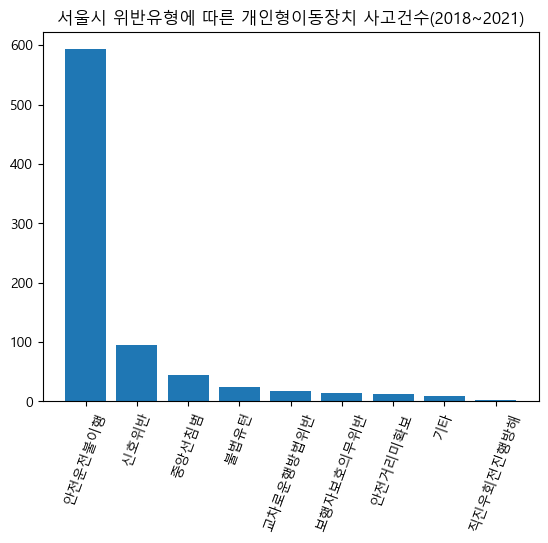

In [ ]:
**서울시 성별 사고건수 시각화**plt.bar(type_df.index, type_df['발생건수'])
plt.title('서울시 위반유형에 따른 개인형이동장치 사고건수(2018~2021)')
plt.xticks(rotation=70)
plt.show()

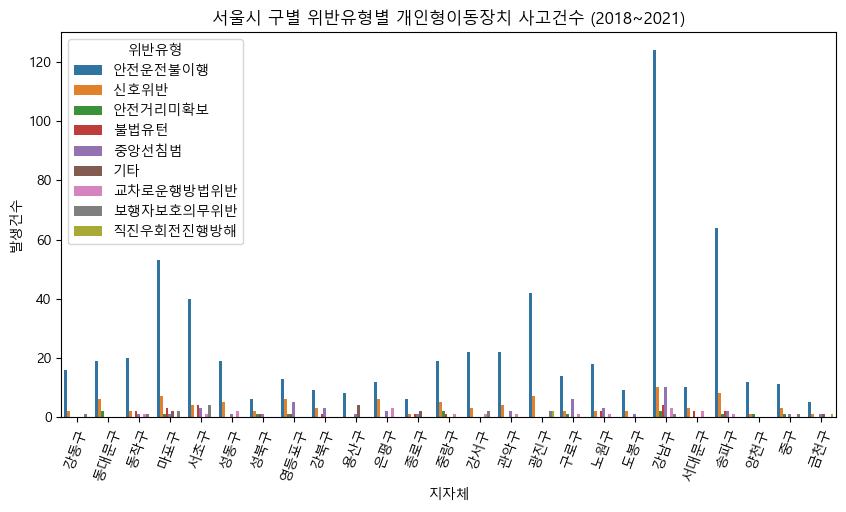

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=type_data, x='지자체', y='발생건수', hue='위반유형')
plt.xticks(rotation=70)
plt.title('서울시 구별 위반유형별 개인형이동장치 사고건수 (2018~2021)')

plt.show()

**서울시 구별 위반유형별 사고건수 시각화 분석**

- 의도 : 서울시의 구별 전동킥보드 사고건수 중 위반유형별로 나누어 어떠한 위반유형으로 사고가 많이 발생했는지를 파악할수 있다.


- 해석 : 모든 서울시의 구에서 안전운전불이행으로 인한 사고가 가장 많이 발생한것으로 나타났다. 전동킥보드 이용자들에게 미리 안전운행에 관한 동영상을 의무적으로 시청하는 등의 제도 개선이 필요할 것으로 보여진다.

### 연령대별

In [ ]:

age_data = pd.read_csv('./data/연령별 교통사고 전처리 데이터.csv', index_col=0, encoding='cp949')
age_data.head()

,지자체,연령대,발생건수
0,강동구,20대,7
1,동대문구,20대,14
2,동작구,20대,22
3,마포구,20대,42
4,서초구,20대,35


In [ ]:
age_df = age_data.pivot_table(index='연령대', values='발생건수', aggfunc='sum')
age_df = age_df.sort_index()
age_df

,발생건수
연령대,
20대,442
20대 미만,154
30대,220
40대,103
50대,45
60대 이상,41
알수없음,8


#### 나이순으로 인덱스 재정렬

In [ ]:
age_df.index

Index(['20대', '20대 미만', '30대', '40대', '50대', '60대 이상', '알수없음'], dtype='object', name='연령대')

In [ ]:
age_df = age_df.reindex(['20대 미만', '20대', '30대', '40대', '50대', '60대 이상', '알수없음'])
age_df

,발생건수
연령대,
20대 미만,154
20대,442
30대,220
40대,103
50대,45
60대 이상,41
알수없음,8


**서울시 성별 사고건수 시각화**

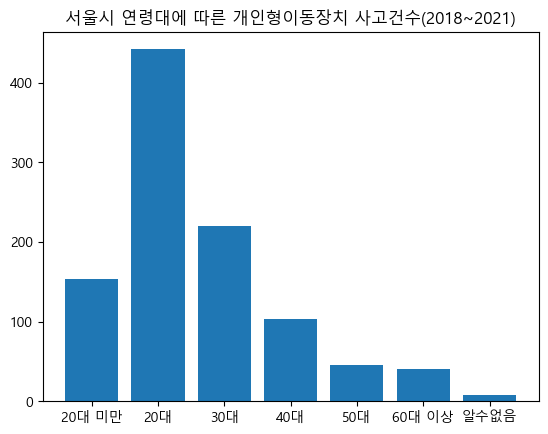

In [ ]:
**서울시 성별 사고건수 시각화**plt.bar(age_df.index, age_df['발생건수'])
plt.title('서울시 연령대에 따른 개인형이동장치 사고건수(2018~2021)')
plt.show()

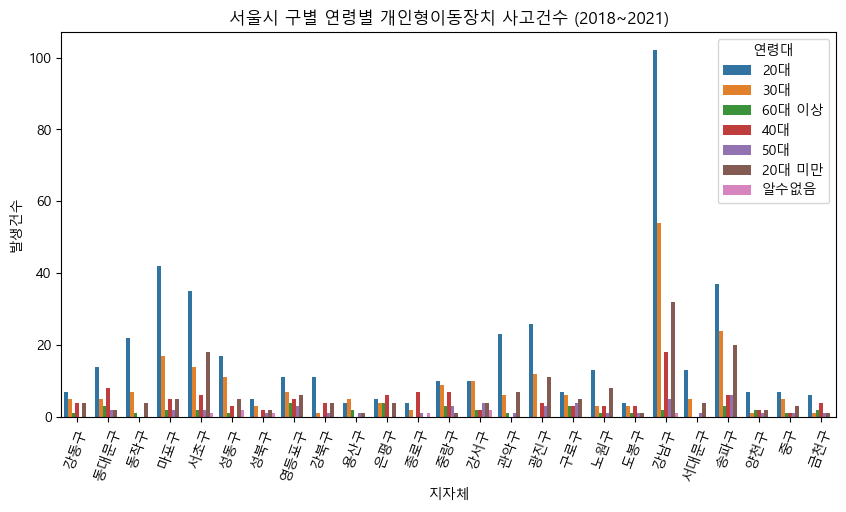

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=age_data, x='지자체', y='발생건수', hue='연령대')
plt.xticks(rotation=70)
plt.title('서울시 구별 연령별 개인형이동장치 사고건수 (2018~2021)')

plt.show()

**서울시 구별 연령별 사고건수 시각화 분석**

- 의도 : 서울시의 구별 전동킥보드 사고건수 중 연령을 구분하여 시각화 한것 대체적으로 어떠한 연령대가 사고가 많이 났는지를 파악해볼수 있다.


- 해석 : 대체적으로 20대와 30대의 사고건수가 주를이루고 20대 미만의 이용자들의 사고율도 적지 않은 편이다. 20대 미만의 연령층의 경우에는 만 16세 이상으로 법이 개정이 되어 실질적으로는 17세 부터이기 때문에 17세부터 30대의 이용자들의 사고건수가 대부분이다. 안전교육을 실시할때에는 이러한 젊은 층의 연령대에 맞추어 안전교육을 실시하는 것이 효과가 좋을것 같다.


## 3. 서울시 전동킥보드 견인 구역, 유형별 시각화(2021-2022)



**활용 데이터 서울시 전동킥보드 견인 현황(2017-2021)**
>- 즉시견인구역 유형별 재 구성<br>
•버스정류소 전면 5M<br>
•보행자와 차량이 분리된 차도 및 자전거도로<br>
•점자블럭 및 교통섬 위<br> 
•지하철역 출구 전면 5M<br>
•횡단보도 전후 3M<br>
•그 외 주차 금지 구역<br>
>- 즉시견인구역 주소값을 통해 지도 시각화<br>
•kakao rest api, geocode 를 통해 좌표값 추출<br>

**오신고 유형은 결측값으로 취급**

#### 데이터 전처리 개요
>- 데이터불러오기
> - 데이터 유형 재구성
> - 결측치 확인및 제거 
> - pivot_table을 통하여 데이터 재구성
> - boxplot을 이용한 시각화
> - rest.api 서비스를 함수로 지정하여  사용
> - 지오코딩을 임포트하여 결손된값 다시 변환
> - 지도에 MarkerCluster 삽입

### 서울시 전동킥보드 견인구역 유형별 시각화분석

**데이터 불러오기**

In [ ]:
tow = pd.read_csv('./data/서울특별시_전동킥보드_견인_현황_20220731.csv', 
                    engine='python', encoding='cp949', error_bad_lines=False)
tow

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23772\3452143554.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tow = pd.read_csv('./data/서울특별시_전동킥보드_견인_현황_20220731.csv',


,번호,신고일,구정보,주소,유형,조치일
0,1,2021-07-15,동작구,서울특별시 동작구 상도동 215-45,"점자블록, 엘리베이터 입구",2021-07-15
1,2,2021-07-15,동작구,서울특별시 동작구 상도동 172-28,보도 중앙,2021-07-15
2,3,2021-07-15,동작구,서울특별시 동작구 대방동 356-2,"버스정류장, 택시 승강장",2021-07-15
3,4,2021-07-15,동작구,서울특별시 동작구 대방동 354-1,"버스정류장, 택시 승강장",2021-07-15
4,5,2021-07-15,동작구,서울특별시 동작구 신대방동 460-30,보도와 차도가 구분된 도로의 차도,2021-07-15
...,...,...,...,...,...,...
60600,60601,2022-07-29,동작구,서울특별시 동작구 사당동 708-1025,보도와 차도가 구분된 도로의 차도,2022-07-29
60601,60602,2022-07-29,관악구,서울특별시 관악구 봉천동 1693-55,보도와 차도가 구분된 도로의 차도,2022-07-29
60602,60603,2022-07-29,동작구,서울특별시 동작구 사당동 175-56,보도와 차도가 구분된 도로의 차도,2022-07-29
60603,60604,2022-07-29,동작구,서울특별시 동작구 사당동 175-26,보도와 차도가 구분된 도로의 차도,2022-07-29


In [ ]:
tow.유형.unique()

array(['점자블록, 엘리베이터 입구', '보도 중앙', '버스정류장, 택시 승강장', '보도와 차도가 구분된 도로의 차도',
       '기타', '횡단보도, 산책로 등', '건물, 상가 보행자 진출입', '소방시설 5m 이내 구역',
       '육교위, 지하보차도 안', '자전거 도로', '지하철역 진출입로 및 주변', '오신고', '턱을 낮춘 진출입로',
       nan, '통행제한 구간', '계단, 난간'], dtype=object)

**데이터 유형 재구성**

In [ ]:
tow.replace('보도와 차도가 구분된 도로의 차도','보행자와 차량이 분리된 차도 및 자전거도로', inplace=True)
tow.replace('자전거 도로','보행자와 차량이 분리된 차도 및 자전거도로', inplace=True)
tow.replace('지하철역 진출입로 및 주변','지하철역 출구 전면 5M', inplace=True)
tow.replace('버스정류장, 택시 승강장','버스정류소 전면 5M', inplace=True)
tow.replace('점자블록, 엘리베이터 입구','점자블럭 및 교통섬 위', inplace=True)
tow.replace('횡단보도, 산책로 등','횡단보도 전후 3M', inplace=True)
tow.replace('건물, 상가 보행자 진출입','그 외 주차 금지 구역', inplace=True)
tow.replace('계단, 난간','그 외 주차 금지 구역', inplace=True)
tow.replace('기타','그 외 주차 금지 구역', inplace=True)
tow.replace('보도 중앙','그 외 주차 금지 구역', inplace=True)
tow.replace('육교위, 지하보차도 안','그 외 주차 금지 구역', inplace=True)
tow.replace('소방시설 5m 이내 구역','그 외 주차 금지 구역', inplace=True)
tow.replace('턱을 낮춘 진출입로','그 외 주차 금지 구역', inplace=True)
tow.replace('통행제한 구간','그 외 주차 금지 구역', inplace=True)

**결측치 확인및 제거**

In [ ]:
tow.유형.isnull().sum()

1

In [ ]:
tow1 = tow.dropna(axis=0)

In [ ]:
tow1 = tow1[(tow1['유형'] != '오신고')]
tow1.유형.unique()

array(['점자블럭 및 교통섬 위', '그 외 주차 금지 구역', '버스정류소 전면 5M',
       '보행자와 차량이 분리된 차도 및 자전거도로', '횡단보도 전후 3M', '지하철역 출구 전면 5M'],
      dtype=object)

**필요한 열(번호,유형)만 추출**

In [ ]:
tow1 = tow1[['번호','유형']]
tow1

,번호,유형
0,1,점자블럭 및 교통섬 위
1,2,그 외 주차 금지 구역
2,3,버스정류소 전면 5M
3,4,버스정류소 전면 5M
4,5,보행자와 차량이 분리된 차도 및 자전거도로
...,...,...
60600,60601,보행자와 차량이 분리된 차도 및 자전거도로
60601,60602,보행자와 차량이 분리된 차도 및 자전거도로
60602,60603,보행자와 차량이 분리된 차도 및 자전거도로
60603,60604,보행자와 차량이 분리된 차도 및 자전거도로


**데이터 정보 확인**

In [ ]:
tow1.유형.value_counts()

보행자와 차량이 분리된 차도 및 자전거도로    30326
횡단보도 전후 3M                  9819
버스정류소 전면 5M                 8198
점자블럭 및 교통섬 위                4496
그 외 주차 금지 구역                4135
지하철역 출구 전면 5M               3582
Name: 유형, dtype: int64

**pivot_table을 통하여 데이터 재구성**

In [ ]:
tow1 = pd.pivot_table(tow1, values='번호', index=['유형'],
                    aggfunc={'유형':'count'})
tow1

,유형
유형,
그 외 주차 금지 구역,4135
버스정류소 전면 5M,8198
보행자와 차량이 분리된 차도 및 자전거도로,30326
점자블럭 및 교통섬 위,4496
지하철역 출구 전면 5M,3582
횡단보도 전후 3M,9819


**개인형 이동장치 견인구역 유형별 시각화**

<AxesSubplot:xlabel='유형'>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '그 외 주차 금지 구역'),
  Text(1, 0, '버스정류소 전면 5M'),
  Text(2, 0, '보행자와 차량이 분리된 차도 및 자전거도로'),
  Text(3, 0, '점자블럭 및 교통섬 위'),
  Text(4, 0, '지하철역 출구 전면 5M'),
  Text(5, 0, '횡단보도 전후 3M')])

Text(0.5, 1.0, ' 견인 구역에 따른 개인형 이동장치 견인 건수')

Text(0.5, 0, '견인 구역 유형')

Text(0, 0.5, '견인건수')

,유형
유형,
그 외 주차 금지 구역,4135
버스정류소 전면 5M,8198
보행자와 차량이 분리된 차도 및 자전거도로,30326
점자블럭 및 교통섬 위,4496
지하철역 출구 전면 5M,3582
횡단보도 전후 3M,9819


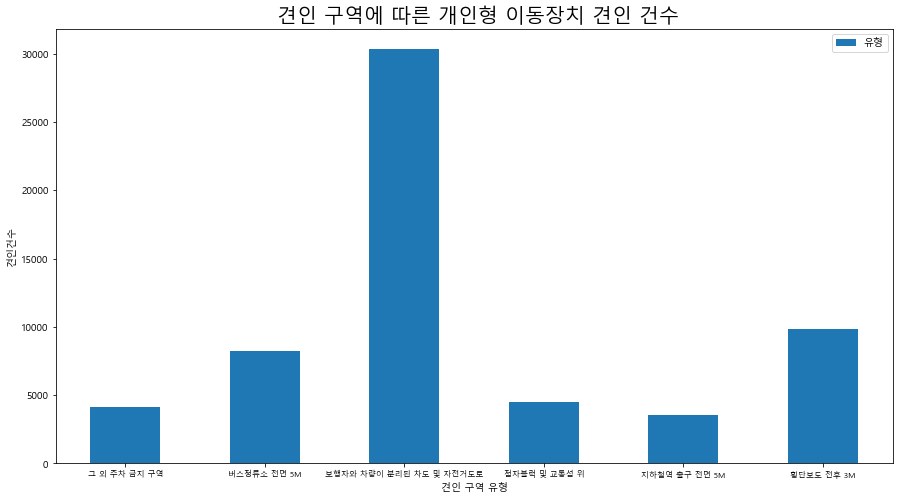

In [ ]:
tow1.plot.bar(figsize=(15,8))
plt.xticks(rotation=0, fontsize=8)

plt.title(' 견인 구역에 따른 개인형 이동장치 견인 건수', fontsize=20)

plt.xlabel('견인 구역 유형', fontsize=10)

plt.ylabel('견인건수', fontsize=10)
tow1

**서울시 전동킥보드 견인구역 유형별 시각화 분석**

- 의도 : 서울시의 전동킥보드의 견인구역의 유형별 시각화 분석을 통하여 어느 유형이 가장 많이 견인 조치를 당했는지 파악


- 해석 : 보행자와 차량이 분리된 차도 및 자전거도로의 유형이 압도적으로 많은것을 볼수 있다. 이는  보행자와 차량이 분리된 차도 및 자전거도로가 이용자가 쉽게 무단 주차를 할수있는 공간으로 보이기 때문에 이용자들에게 견인되는 구역을 인지 할수 있도록 교육하거나 견인이 될수있음을 인지시킬수 있는 장치를 활용하면 좋을것 같다.


### 서울시 전동킥보드 견인구역 시각화

**카카오에서 저공하는 rest.api 서비스를 함수로 지정하여  사용**

In [ ]:
def addr_to_lat_lon(addr):
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query={address}'.format(address=addr)
    headers = {"Authorization": "KakaoAK " + 'c7eeec233835734c4abd0cd0b441950b'}
    result = json.loads(str(requests.get(url, headers=headers).text))
    match_first = result['documents'][0]['address']
    return float(match_first['x']), float(match_first['y'])

**데이터 불러오기**

In [ ]:
read_data = pd.read_csv('./data/서울특별시_전동킥보드_견인_현황_20220731.csv',encoding = 'cp949')
read_data

,번호,신고일,구정보,주소,유형,조치일
0,1,2021-07-15,동작구,서울특별시 동작구 상도동 215-45,"점자블록, 엘리베이터 입구",2021-07-15
1,2,2021-07-15,동작구,서울특별시 동작구 상도동 172-28,보도 중앙,2021-07-15
2,3,2021-07-15,동작구,서울특별시 동작구 대방동 356-2,"버스정류장, 택시 승강장",2021-07-15
3,4,2021-07-15,동작구,서울특별시 동작구 대방동 354-1,"버스정류장, 택시 승강장",2021-07-15
4,5,2021-07-15,동작구,서울특별시 동작구 신대방동 460-30,보도와 차도가 구분된 도로의 차도,2021-07-15
...,...,...,...,...,...,...
60600,60601,2022-07-29,동작구,서울특별시 동작구 사당동 708-1025,보도와 차도가 구분된 도로의 차도,2022-07-29
60601,60602,2022-07-29,관악구,서울특별시 관악구 봉천동 1693-55,보도와 차도가 구분된 도로의 차도,2022-07-29
60602,60603,2022-07-29,동작구,서울특별시 동작구 사당동 175-56,보도와 차도가 구분된 도로의 차도,2022-07-29
60603,60604,2022-07-29,동작구,서울특별시 동작구 사당동 175-26,보도와 차도가 구분된 도로의 차도,2022-07-29


**서울시 전동킥보드 견인현황 데이터의 지번주소를 좌표값으로 변환**

**결측치는 결측된값 프린트 후 (1,1)로 리스트에 저장**

In [ ]:
df_list=[]
for i in range(len(read_data)) : #데이터의 갯수만큼 반복
 try :
    latlng = addr_to_lat_lon(read_data['주소'][i])
    df_list.append(latlng)#주소를 df_list에다가 삽입
    
 except :
    print('error', i)
    latlng = (1,1)
    df_list.append(latlng) #실패시 (1,1)을 df_list에다가 삽입
  

**저장된 값들을 데이터프레임으로 전환후 csv로 저장**

In [ ]:
df = pd.DataFrame(df_list)
df.to_csv('end.csv')

**지오코딩을 임포트하여 결손된값 다시 변환**

In [ ]:


def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    crd = [str(geo.latitude),str(geo.longitude)]

    return crd


**저장한 csv 파일을 불러온뒤 데이터프레임으로 전환**

In [ ]:
x= pd.read_csv("./data/end.csv")
x

FileNotFoundError: [Errno 2] No such file or directory: './data/end.csv'

**필요없는 행 추출**

In [ ]:
x1=x.drop('Unnamed: 0', axis=1)

**결손값들만 추출**

In [ ]:
x2=x1[x1['0']==1]

In [ ]:
y=x2.index #원래있던 자리에 넣기 위하여 인덱스 값을 추출

**결손된 좌표들을 다시 추출후 원래있던 본 데이터에다가 삽입**

In [ ]:
y_list =[]
for i in range(515) :
 try :
    latlng = geocoding(read_data['주소'][y[i]])
    y_list.append(latlng)
    
 except :
    print('error', i)
    latlng = (1,1)
    y_list.append(latlng)

In [ ]:
x3 = x1.values.tolist()

In [ ]:
for i in range(515):
  x3[y[i]] = y_list[i] #결손된값들을 반환후 삽입

In [ ]:
x4 = pd.DataFrame(x3) 

In [ ]:
x4.to_csv('end2.csv') #csv파일로 저장

**좌표와 본래데이터를 합침**

In [ ]:
two = pd.concat([tow,x4],axis=1)

In [ ]:
two

,번호,신고일,구정보,주소,유형,조치일,0,1
0,1,2021-07-15,동작구,서울특별시 동작구 상도동 215-45,점자블럭 및 교통섬 위,2021-07-15,126.942708,37.495444
1,2,2021-07-15,동작구,서울특별시 동작구 상도동 172-28,그 외 주차 금지 구역,2021-07-15,126.941330,37.503920
2,3,2021-07-15,동작구,서울특별시 동작구 대방동 356-2,버스정류소 전면 5M,2021-07-15,126.924512,37.509960
3,4,2021-07-15,동작구,서울특별시 동작구 대방동 354-1,버스정류소 전면 5M,2021-07-15,126.925148,37.510235
4,5,2021-07-15,동작구,서울특별시 동작구 신대방동 460-30,보행자와 차량이 분리된 차도 및 자전거도로,2021-07-15,126.915088,37.493708
...,...,...,...,...,...,...,...,...
60600,60601,2022-07-29,동작구,서울특별시 동작구 사당동 708-1025,보행자와 차량이 분리된 차도 및 자전거도로,2022-07-29,126.968053,37.487147
60601,60602,2022-07-29,관악구,서울특별시 관악구 봉천동 1693-55,보행자와 차량이 분리된 차도 및 자전거도로,2022-07-29,126.957897,37.479764
60602,60603,2022-07-29,동작구,서울특별시 동작구 사당동 175-56,보행자와 차량이 분리된 차도 및 자전거도로,2022-07-29,126.970701,37.490045
60603,60604,2022-07-29,동작구,서울특별시 동작구 사당동 175-26,보행자와 차량이 분리된 차도 및 자전거도로,2022-07-29,126.970577,37.490051


**지도에 MarkerCluster 삽입**
> 유형별로 아이콘과 색상을 다르게 삽입<br>
>- '버스정류소 전면 5M': orange,bus<br>
>- '보행자와 차량이 분리된 차도 및 자전거도로': green,road<br>
>- '점자블럭 및 교통섬 위': black,eye-slash<br>
>- '지하철역 출구 전면 5M': blue,train<br>
>- '횡단보도 3M': puple,align-justify<br>
>- '그 외 주차 금지 구역': red,ban

아이콘 출처 : https://fontawesome.com/icons?from=io<br>
**실행할시 시간이 너무 오래걸림으로 지도 시각화 확인은 data 폴더내의 견인구역 시각화.html을 이용해 주시길 바랍니다**

In [ ]:
m = folium.Map(location=[37.541,126.986],
              zoom_start=15)

In [ ]:
mc= MarkerCluster().add_to(m)

In [ ]:
for  i in range(len(two)):
  if two['유형'][i] == '그 외 주차 금지 구역':
      color = 'red'
      icon = 'ban'
  elif two['유형'][i] == '버스정류소 전면 5M':
      color = 'orange'
      icon = 'bus'
  elif two['유형'][i] == '보행자와 차량이 분리된 차도 및 자전거도로	':    
      color = 'green'
      icon = 'road'
  elif two['유형'][i] == '점자블럭 및 교통섬 위':    
      color = 'black'
      icon = 'eye-slash'
  elif two['유형'][i] == '지하철역 출구 전면 5M':    
      color = 'blue'
      icon = 'train'

  else:
        color = 'purple'  
        icon = 'align-justify'
 


  folium.Marker(location=[two['경도'][i],two['위도'][i]],popup=folium.Popup(two['주소'][i],max_width=200),icon=folium.Icon(icon = icon, color = color,prefix='fa')).add_to(mc)

In [ ]:
m

In [ ]:
m.save('견인구역 시각화.html')# 지도시각화를 html 로 변경후 저장

## 4. 서울시 전동킥보드 무단주차 민원 건수 분석 (2019.07.01-2023.02.28)



**활용 데이터 서울정보소통광장 전동킥보드 민원 건수 (2019.07.01-2023.02.28)**<br>
>• 웹크롤링을 통하여 서울시 전동킥보드 견인정책 을 시행하기 2년전과 현재까지의 민원 데이터(2019-07-01 ~ 2021-07-14), (2021-07-15 ~ 2023-02-28)

#### 데이터 전처리 개요
>- 웹크롤링을통한 데이터 추출(동적 웹크롤링)
>- 크롬 드라이버 객체 생성
> - 웹페이지 로드, '민원 전동킥보드 무단방치 관련'키워드로 추출
> - 019.07.01-2023.02.28의 기간 동안 월별 데이터 추출
> - 선그래프 이용한 시각화

In [ ]:
driver = webdriver.Chrome(service=service)

In [ ]:
driver.implicitly_wait(3)#3초안에 웹페이지를 load 하면 바로 넘어가거나, 3초를 기다림.

#### '서울정보소통광장' 크롤링

**서울정보소통광장 검색기간 기간설정 url**

In [ ]:
url = 'https://opengov.seoul.go.kr/sanction/list?rangeDate=custom'
driver.get(url)

**검색어 카테고리 -> '제목'**

In [ ]:
Category = driver.find_element(By.ID, 'searchCategory')
Category.send_keys('제목')

**검색어 입력**

In [ ]:
keyword = driver.find_element(By.ID, 'searchKeyword')
keyword.send_keys('민원 전동킥보드 무단방치 관련')

**# 검색기간 시작 날짜**

In [ ]:
startdate = '2019-07-01'
startDate = driver.find_element(By.ID,'startDate')
startDate.send_keys(startdate)

**검색기간 끝 날짜**

In [ ]:
enddate = '2021-07-14'
endDate = driver.find_element(By.ID,'endDate')
endDate.send_keys(enddate)

**검색' 버튼 클릭**

In [ ]:
xpath = '//*[@id="content"]/div/div[1]/div[1]/form/div[1]/div[2]/button[2]'
driver.find_element(By.XPATH, xpath).click()

**html 파싱**

In [ ]:
page_source = driver.page_source 
soup = BeautifulSoup(page_source, "html.parser")

**검색결과 건수**

In [ ]:
cnt = soup.find('div', {'class':'al-left'}).text
cnt

'\n검색결과 : 260건\n\t\t\t\t\t\t\t'

In [ ]:
cnt = cnt.split(' ')[2].split('건')[0]
cnt

'260'

#### 건수 추출 함수로 정의

In [ ]:
import time

def search_cnt(keyword, startdate, enddate):
    url = 'https://opengov.seoul.go.kr/sanction/list?rangeDate=custom'
    driver.get(url)
    Category = driver.find_element(By.ID, 'searchCategory')
    Category.send_keys('제목')
    Keyword = driver.find_element(By.ID, 'searchKeyword')
    Keyword.send_keys(keyword)
    startDate = driver.find_element(By.ID,'startDate')
    startDate.send_keys(startdate)
    endDate = driver.find_element(By.ID,'endDate')
    endDate.send_keys(enddate)
    time.sleep(2)
    
    # 조회 버튼 클릭
    xpath = '//*[@id="content"]/div/div[1]/div[1]/form/div[1]/div[2]/button[2]'
    driver.find_element(By.XPATH, xpath).click()
    time.sleep(2)
    
    page_source = driver.page_source 
    soup = BeautifulSoup(page_source, "html.parser")
    
    cnt = soup.find('div', {'class':'al-left'}).text
    cnt = cnt.split(' ')[2].split('건')[0]
    return cnt

#### '민원 전동킥보드 무단방치 관련' 검색

In [ ]:
min_before = search_cnt('민원 전동킥보드 무단방치 관련', '2019-07-01', '2021-07-14')
min_before

'253'

In [ ]:
min_after = search_cnt('민원 전동킥보드 무단방치 관련', '2021-07-15', '2023-02-28')
min_after

'22'

#### '국민신문고 전동킥보드 무단방치 관련' 검색

In [ ]:
guk_before = search_cnt('국민신문고 전동킥보드 무단방치 관련', '2019-07-01', '2021-07-14')
guk_before

'16'

In [ ]:
guk_after = search_cnt('국민신문고 전동킥보드 무단방치 관련', '2021-07-15', '2023-02-28')
guk_after

'56'

#### 정책시행 이전, 이후 비교

In [ ]:
before = int(min_before) + int(guk_before)
after = int(min_after) + int(guk_after)

print(f'정책시행 이전(2019-07-01~2021-07-14) 민원 건수는 {before}, 정책시행 이후(2021-07-15~2023-02-28) 민원 건수는 {after}이다')

정책시행 이전(2019-07-01~2021-07-14) 민원 건수는 269, 정책시행 이후(2021-07-15~2023-02-28) 민원 건수는 78이다


In [ ]:
print(f'정책시행 이후 민원 감소율은 {(after-before)/before*100 :.2f}%이다.')

정책시행 이후 민원 감소율은 -71.00%이다.


#### 월별 민원 건수 추출

#### 월별 시작 및 끝 날짜 생성

In [ ]:
monthStart = pd.date_range(start='2019-07-01', end='2023-02-28', freq='MS')
monthStart =  monthStart.strftime("%Y-%m-%d")
monthStart

Index(['2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
       '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
       '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
       '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
       '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
       '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
       '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
       '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
       '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01'],
      dtype='object')

In [ ]:
monthEnd = pd.date_range(start='2019-07-01', end='2023-02-28', freq='BM')
monthEnd =  monthEnd.strftime("%Y-%m-%d")
monthEnd

Index(['2019-07-31', '2019-08-30', '2019-09-30', '2019-10-31', '2019-11-29',
       '2019-12-31', '2020-01-31', '2020-02-28', '2020-03-31', '2020-04-30',
       '2020-05-29', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
       '2020-10-30', '2020-11-30', '2020-12-31', '2021-01-29', '2021-02-26',
       '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-30',
       '2021-08-31', '2021-09-30', '2021-10-29', '2021-11-30', '2021-12-31',
       '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-29', '2022-05-31',
       '2022-06-30', '2022-07-29', '2022-08-31', '2022-09-30', '2022-10-31',
       '2022-11-30', '2022-12-30', '2023-01-31', '2023-02-28'],
      dtype='object')

#### 월별 민원 건수 데이터프레임 생성

In [ ]:
Count = pd.DataFrame([], columns = ['시작날짜', '종료날짜', '"민원"건수', '"국민신문고"건수'])
for i in range(len(monthStart)):
    mcnt = search_cnt('민원 전동킥보드 무단방치 관련', monthStart[i], monthEnd[i])
    kcnt = search_cnt('국민신문고 전동킥보드 무단방치 관련', monthStart[i], monthEnd[i])
    Count.loc[i] = {'시작날짜': monthStart[i], '종료날짜': monthEnd[i],
                    '"민원"건수':mcnt, '"국민신문고"건수':kcnt}
Count

,시작날짜,종료날짜,"""민원""건수","""국민신문고""건수"
0,2019-07-01,2019-07-31,0,0
1,2019-08-01,2019-08-30,0,0
2,2019-09-01,2019-09-30,0,0
3,2019-10-01,2019-10-31,0,0
4,2019-11-01,2019-11-29,0,0
5,2019-12-01,2019-12-31,0,0
6,2020-01-01,2020-01-31,0,0
7,2020-02-01,2020-02-28,0,0
8,2020-03-01,2020-03-31,0,0
9,2020-04-01,2020-04-30,0,0


#### '민원'건수와 '국민신문고'건수 합치기

In [ ]:
Count['"민원"건수'] = Count['"민원"건수'].astype(int)
Count['"국민신문고"건수'] = Count['"국민신문고"건수'].astype(int)
Count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   시작날짜       44 non-null     object
 1   종료날짜       44 non-null     object
 2   "민원"건수     44 non-null     int32 
 3   "국민신문고"건수  44 non-null     int32 
 4   건수         0 non-null      object
dtypes: int32(2), object(3)
memory usage: 1.7+ KB


#### csv 파일로 내보내기

In [ ]:
Count.to_csv('./data/monthly_민원.csv')

**데이터 불러오기**

In [ ]:
Count = pd.read_csv('./data/monthly_민원.csv', index_col=0)
Count.head()

,시작날짜,종료날짜,"""민원""건수","""국민신문고""건수",건수
0,2019-07-01,2019-07-31,0,0,0
1,2019-08-01,2019-08-30,0,0,0
2,2019-09-01,2019-09-30,0,0,0
3,2019-10-01,2019-10-31,0,0,0
4,2019-11-01,2019-11-29,0,0,0


**월별 idex설정**

In [ ]:
Count['년월'] = Count['시작날짜'].str[:-3]
Count.set_index(Count['년월'], inplace=True)
Count.drop('년월', axis=1, inplace=True)
Count

,시작날짜,종료날짜,"""민원""건수","""국민신문고""건수",건수
년월,,,,,
2019-07,2019-07-01,2019-07-31,0,0,0
2019-08,2019-08-01,2019-08-30,0,0,0
2019-09,2019-09-01,2019-09-30,0,0,0
2019-10,2019-10-01,2019-10-31,0,0,0
2019-11,2019-11-01,2019-11-29,0,0,0
2019-12,2019-12-01,2019-12-31,0,0,0
2020-01,2020-01-01,2020-01-31,0,0,0
2020-02,2020-02-01,2020-02-28,0,0,0
2020-03,2020-03-01,2020-03-31,0,0,0


**전동킥보드 무단방치 관련 민원 월별 건수 시각화**

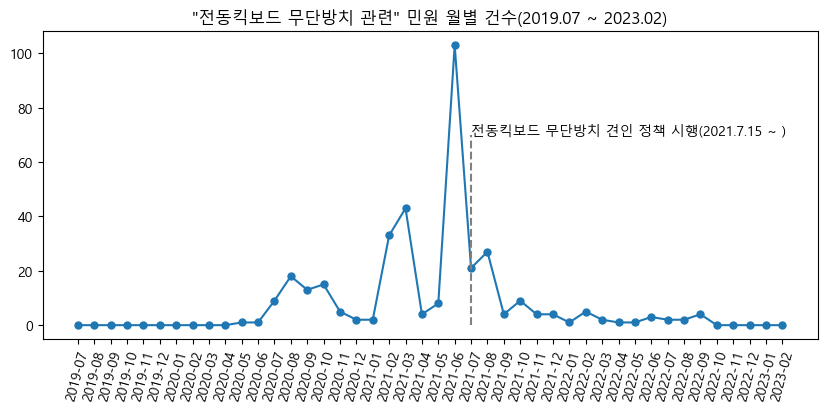

In [ ]:
plt.figure(figsize = (10, 4))
plt.plot(Count.건수, marker='o', ms=5)
plt.xticks(rotation=75)
plt.vlines(24, 0, 70, color='gray', ls='--')
plt.text(24, 70, '전동킥보드 무단방치 견인 정책 시행(2021.7.15 ~ )')
plt.title('"전동킥보드 무단방치 관련" 민원 월별 건수(2019.07 ~ 2023.02)')

plt.show()

In [ ]:
#그래프에 건수 표시
dic = {}
for i in range(len(Count)):
    if Count.iloc[i]['건수'] != 0:
        dic[i] = Count.iloc[i].건수

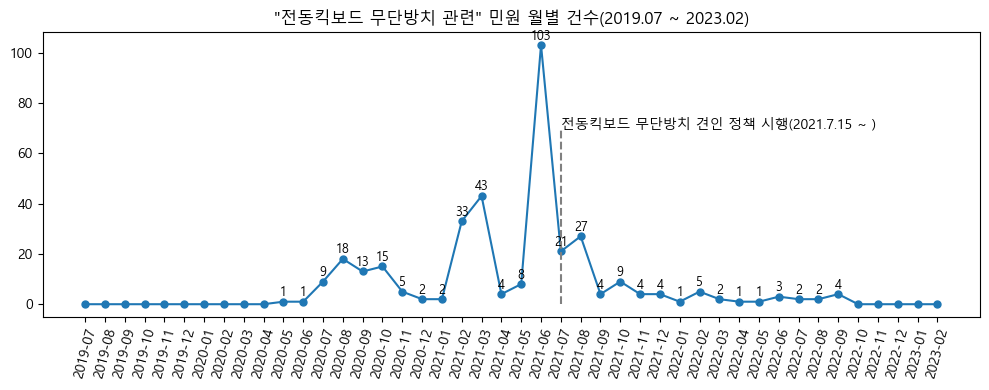

In [ ]:
plt.figure(figsize = (10, 4))
plt.plot(Count.건수, marker='o', ms=5)
plt.xticks(rotation=75)
plt.vlines(24, 0, 70, color='gray', ls='--')
plt.text(24, 70, '전동킥보드 무단방치 견인 정책 시행(2021.7.15 ~ )')# 정책시행 시점 표시
plt.title('"전동킥보드 무단방치 관련" 민원 월별 건수(2019.07 ~ 2023.02)')

# 1건 이상인 월의 값만 표시
for k, v in dic.items():
    plt.text(k, v+1, v,
             fontsize=9,
             horizontalalignment='center',
             verticalalignment='bottom')
plt.tight_layout()
# plt.show()

plt.savefig('민원건수.png', dpi=200)

**서울시 '전동킥보드 무단방치 관련'민원 월별 시각화 분석**

- 의도 : 서울시의 전동킥보드 견인 정책 시행 시점(2021.7.15)의 전 후 2년(2019.07 - 2023.02) 을 확인 하여 정책 시행후의 민원의 수의 증 감을 파악 할 수 있다.


- 해석 : 서울시의 전동킥보드 견인 정책 시행 전 대비 이후의 민원이 71%감소 됨을 확인 할 수 있었으며,서울시의 전동킥보드 견인 정책이 민원 감소에 도움을 줄수 있음을 확인해볼수 있다.

### 

## 기상청 단기예보 조회 서비스(open api)



**활용 데이터 기상청 단기예보 조회 서비스**
>- 전국의 각구별 날씨정보를 실시간으로 제공하는 api 서비스<br>
>- 서울시의 각구별 날씨정보를 제공받아 실시간으로 기상상태별 사고율을 알려줄수있음
>- 이를 활용하여 대시보드에서 실시간으로 이용자가 원하는 서울시의 구별 기상상태와 사교율을 제공할수 있음


#### 데이터 전처리 개요
>- api 불러오기,변수지정,api 요소확인,데이터프레임으로정리,필요한요소만 사용(sky,pty)
> - 구별 기상청 제공 격자 위경도 추출(기상청에서 임의로 정한 구별 고유한값)
> - 서울시 구별 기상상태별 사고건수 데이터와 연결,사고율계산 
> - 구별 날씨별 날씨 및 사고율 출력 함수 정의


####  API 불러오기

- 기상청 단기예보 조회 서비스(https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15084084)

**변수지정**

In [ ]:
# 현재 날짜, 현재 시각
now = datetime.datetime.now()
base_date = now.date().strftime("%Y%m%d")

# 발표 시각을 현재시간 1시간 전으로 조회 (예측시간을 현재시간에 맞추기 위함)
base_time = (now - datetime.timedelta(hours=1)).strftime("%H%M")

In [ ]:
key = 'POt4cCBFEG6ttsuSzsLdyQDtxAjMUVHZvy40cGESFGdxUv7ggP7qGYhXb8lpgM9epQZi8RZ7ZFgxWBDvulRAzA=='
url = 'http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getUltraSrtFcst'

x = 55
y = 127


params = {'ServiceKey':key,
          'numOfRows':1000,
          'pageNo':1,
          'base_date':base_date,
          'base_time':base_time,
         'nx':x,
         'ny':y}

In [ ]:
res = requests.get(url, params=params)
res

<Response [200]>

In [ ]:
soup = BeautifulSoup(res.text,'xml')
soup

<?xml version="1.0" encoding="utf-8"?>
<response><header><resultCode>00</resultCode><resultMsg>NORMAL_SERVICE</resultMsg></header><body><dataType>XML</dataType><items><item><baseDate>20230322</baseDate><baseTime>0930</baseTime><category>LGT</category><fcstDate>20230322</fcstDate><fcstTime>1000</fcstTime><fcstValue>0</fcstValue><nx>55</nx><ny>127</ny></item><item><baseDate>20230322</baseDate><baseTime>0930</baseTime><category>LGT</category><fcstDate>20230322</fcstDate><fcstTime>1100</fcstTime><fcstValue>0</fcstValue><nx>55</nx><ny>127</ny></item><item><baseDate>20230322</baseDate><baseTime>0930</baseTime><category>LGT</category><fcstDate>20230322</fcstDate><fcstTime>1200</fcstTime><fcstValue>0</fcstValue><nx>55</nx><ny>127</ny></item><item><baseDate>20230322</baseDate><baseTime>0930</baseTime><category>LGT</category><fcstDate>20230322</fcstDate><fcstTime>1300</fcstTime><fcstValue>0</fcstValue><nx>55</nx><ny>127</ny></item><item><baseDate>20230322</baseDate><baseTime>0930</baseTime><cate

In [ ]:
items = soup.findAll('item')
items

[<item><baseDate>20230322</baseDate><baseTime>0930</baseTime><category>LGT</category><fcstDate>20230322</fcstDate><fcstTime>1000</fcstTime><fcstValue>0</fcstValue><nx>55</nx><ny>127</ny></item>,
 <item><baseDate>20230322</baseDate><baseTime>0930</baseTime><category>LGT</category><fcstDate>20230322</fcstDate><fcstTime>1100</fcstTime><fcstValue>0</fcstValue><nx>55</nx><ny>127</ny></item>,
 <item><baseDate>20230322</baseDate><baseTime>0930</baseTime><category>LGT</category><fcstDate>20230322</fcstDate><fcstTime>1200</fcstTime><fcstValue>0</fcstValue><nx>55</nx><ny>127</ny></item>,
 <item><baseDate>20230322</baseDate><baseTime>0930</baseTime><category>LGT</category><fcstDate>20230322</fcstDate><fcstTime>1300</fcstTime><fcstValue>0</fcstValue><nx>55</nx><ny>127</ny></item>,
 <item><baseDate>20230322</baseDate><baseTime>0930</baseTime><category>LGT</category><fcstDate>20230322</fcstDate><fcstTime>1400</fcstTime><fcstValue>0</fcstValue><nx>55</nx><ny>127</ny></item>,
 <item><baseDate>20230322

**필요한요소들만 지정**

In [ ]:
cols = ['baseDate','baseTime','category','fcstDate','fcstTime','fcstValue','nx','ny']

#### api 요소 데이터프레임으로 정리하기

In [ ]:
dict_list = []
for item in items:
    dict = {}    
    for col in cols:
        dict[col] = item.find(col).text
    dict_list.append(dict)

In [ ]:
dict_list

[{'baseDate': '20230322',
  'baseTime': '0930',
  'category': 'LGT',
  'fcstDate': '20230322',
  'fcstTime': '1000',
  'fcstValue': '0',
  'nx': '55',
  'ny': '127'},
 {'baseDate': '20230322',
  'baseTime': '0930',
  'category': 'LGT',
  'fcstDate': '20230322',
  'fcstTime': '1100',
  'fcstValue': '0',
  'nx': '55',
  'ny': '127'},
 {'baseDate': '20230322',
  'baseTime': '0930',
  'category': 'LGT',
  'fcstDate': '20230322',
  'fcstTime': '1200',
  'fcstValue': '0',
  'nx': '55',
  'ny': '127'},
 {'baseDate': '20230322',
  'baseTime': '0930',
  'category': 'LGT',
  'fcstDate': '20230322',
  'fcstTime': '1300',
  'fcstValue': '0',
  'nx': '55',
  'ny': '127'},
 {'baseDate': '20230322',
  'baseTime': '0930',
  'category': 'LGT',
  'fcstDate': '20230322',
  'fcstTime': '1400',
  'fcstValue': '0',
  'nx': '55',
  'ny': '127'},
 {'baseDate': '20230322',
  'baseTime': '0930',
  'category': 'LGT',
  'fcstDate': '20230322',
  'fcstTime': '1500',
  'fcstValue': '0',
  'nx': '55',
  'ny': '127'}

#### 필요한 요소만 사용
- SKY(하늘상태코드) : 맑음(1), 구름많음(3), 흐림(4) 
- PTY(강수형태코드) : 없음(0), 비(1), 비/눈(2), 눈(3), 빗방울(5), 빗방울눈날림(6), 눈날림(7)

In [ ]:
df = pd.DataFrame(dict_list, columns = cols)
sky = df[df['category']=='SKY'].iloc[0].fcstValue
sky

'4'

In [ ]:
pty = df[df['category']=='PTY'].iloc[0].fcstValue
pty

'0'

#### 구별 기상청 제공 격자 위경도 추출

In [ ]:
xy_df = pd.read_excel('기상청41_단기예보 조회서비스_오픈API활용가이드_격자_위경도(20221027).xlsx')
xy_df.head(5)

,구분,행정구역코드,1단계,2단계,3단계,격자 X,격자 Y,경도(시),경도(분),경도(초),위도(시),위도(분),위도(초),경도(초/100),위도(초/100),위치업데이트
0,kor,1100000000,서울특별시,NaN,NaN,60,127,126,58,48.03,37,33,48.85,126.980008,37.563569,NaN
1,kor,1111000000,서울특별시,종로구,NaN,60,127,126,58,53.91,37,34,13.36,126.981642,37.570378,NaN
2,kor,1111051500,서울특별시,종로구,청운효자동,60,127,126,58,14.35,37,35,2.89,126.970652,37.584137,NaN
3,kor,1111053000,서울특별시,종로구,사직동,60,127,126,58,15.44,37,34,23.77,126.970956,37.573269,NaN
4,kor,1111054000,서울특별시,종로구,삼청동,60,127,126,59,2.32,37,34,56.73,126.983978,37.582425,NaN


In [ ]:
# 서울시만 추출
xy_seoul = xy_df[xy_df['1단계'] == '서울특별시']
xy_seoul

,구분,행정구역코드,1단계,2단계,3단계,격자 X,격자 Y,경도(시),경도(분),경도(초),위도(시),위도(분),위도(초),경도(초/100),위도(초/100),위치업데이트
0,kor,1100000000,서울특별시,NaN,NaN,60,127,126,58,48.03,37,33,48.85,126.980008,37.563569,NaN
1,kor,1111000000,서울특별시,종로구,NaN,60,127,126,58,53.91,37,34,13.36,126.981642,37.570378,NaN
2,kor,1111051500,서울특별시,종로구,청운효자동,60,127,126,58,14.35,37,35,2.89,126.970652,37.584137,NaN
3,kor,1111053000,서울특별시,종로구,사직동,60,127,126,58,15.44,37,34,23.77,126.970956,37.573269,NaN
4,kor,1111054000,서울특별시,종로구,삼청동,60,127,126,59,2.32,37,34,56.73,126.983978,37.582425,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,kor,1174065000,서울특별시,강동구,성내제2동,62,126,127,7,53.71,37,31,46.57,127.131586,37.529603,NaN
448,kor,1174066000,서울특별시,강동구,성내제3동,63,126,127,8,5.59,37,31,24.14,127.134886,37.523372,NaN
449,kor,1174068500,서울특별시,강동구,길동,63,126,0,0,0.00,0,0,0.00,127.146168,37.539217,20150908.0
450,kor,1174069000,서울특별시,강동구,둔촌제1동,63,126,127,8,19.79,37,31,14.70,127.138831,37.520750,NaN


In [ ]:
# 구 이름 확인
gu = xy_seoul['2단계'].unique()[1:]
gu

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [ ]:
gu[0]

'종로구'

In [ ]:
xy_seoul[xy_seoul['2단계'] == gu[1]].iloc[0]['격자 Y']

127

#### 구별 x,y 데이터프레임 생성

In [ ]:
#기상청에서 임의로 지정한 각구별 x,y격자 위경도 실시간 날씨정보를 확인하기위해 임의로 정한 변수
xy = pd.DataFrame([], columns=['구', 'x', 'y'])

for i in range(len(gu)):
    xy.loc[i] = [xy_seoul[xy_seoul['2단계'] == gu[i]].iloc[0]['2단계'],
                  xy_seoul[xy_seoul['2단계'] == gu[i]].iloc[0]['격자 X'],
                  xy_seoul[xy_seoul['2단계'] == gu[i]].iloc[0]['격자 Y']]
xy

,구,x,y
0,종로구,60,127
1,중구,60,127
2,용산구,60,126
3,성동구,61,127
4,광진구,62,126
5,동대문구,61,127
6,중랑구,62,128
7,성북구,61,127
8,강북구,61,128
9,도봉구,61,129


In [ ]:
xy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구       25 non-null     object
 1   x       25 non-null     int64 
 2   y       25 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 800.0+ bytes


#### csv 파일로 내보내기

In [ ]:
xy.to_csv('./data/기상청제공위경도.csv')

#### 구 입력해서 현재날씨 조회해보기

In [ ]:
input_gu = input('구를 입력하세요')

구를 입력하세요강남구


In [ ]:
x = xy[xy['구']==input_gu].x
y = xy[xy['구']==input_gu].y

In [ ]:
key = 'POt4cCBFEG6ttsuSzsLdyQDtxAjMUVHZvy40cGESFGdxUv7ggP7qGYhXb8lpgM9epQZi8RZ7ZFgxWBDvulRAzA=='
url = 'http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getUltraSrtFcst'

now = datetime.datetime.now()
base_date = now.date().strftime("%Y%m%d")
base_time = now.time().strftime("%H%M")

params = {'ServiceKey':key,
          'numOfRows':1000,
          'pageNo':1,
          'base_date':base_date,
          'base_time':base_time,
         'nx':x,
         'ny':y}

In [ ]:
print(x, y , base_date, base_time)

22    61
Name: x, dtype: int64 22    126
Name: y, dtype: int64 20230322 1019


In [ ]:
res = requests.get(url, params=params)
soup = BeautifulSoup(res.text,'xml')
items = soup.findAll('item')

In [ ]:
cols = ['baseDate','baseTime','category','fcstDate','fcstTime','fcstValue','nx','ny']
dict_list = []
for item in items:
    dict = {}    
    for col in cols:
        dict[col] = item.find(col).text
    dict_list.append(dict)

In [ ]:
df = pd.DataFrame(dict_list, columns = cols)
sky = df[df['category']=='SKY'].iloc[0].fcstValue
pty = df[df['category']=='PTY'].iloc[0].fcstValue
print(sky,pty)

4 0


#### sky, pyt 코드를 이용해 예보 날씨를 맑음/흐림/눈/비로 구분하기

In [ ]:
if (pty == '1') | (pty == '5'):
    print(f'{input_gu} 현재 날씨 : 비')
elif (pty == '3') | (pty == '7'):
    print(f'{input_gu} 현재 날씨 : 눈')
elif (sky == '1') & (pty == '0'):
    print(f'{input_gu} 현재 날씨 :맑음')
elif ((sky == '3') & (pty == '0')) | ((sky == '4') & (pty == '0')) :
    print(f'{input_gu} 현재 날씨 : 흐림')
else:
    print(f'{input_gu} 현재 날씨 : 안좋음')

강남구 현재 날씨 : 흐림


In [ ]:
#### 발표 시각을 현재시간 1시간 전으로 조회 (예측시간을 현재시간에 맞추기 위함)
base_time = (now - datetime.timedelta(hours=1)).strftime("%H%M")
base_time

'0919'

In [ ]:
x = xy[xy['구']=='은평구'].x
y = xy[xy['구']=='은평구'].y
now = datetime.datetime.now()
base_date = now.date().strftime("%Y%m%d")
base_time = (now - datetime.timedelta(hours=1)).strftime("%H%M")
params = {'ServiceKey':key,
          'numOfRows':1000,
          'pageNo':1,
          'base_date':base_date,
          'base_time':base_time,
          'nx':x,
          'ny':y}
    
res = requests.get(url, params=params)
soup = BeautifulSoup(res.text,'xml')
items = soup.findAll('item')
    
cols = ['baseDate','baseTime','category','fcstDate','fcstTime','fcstValue','nx','ny']
dict_list = []
for item in items:
    dict = {}    
    for col in cols:
        dict[col] = item.find(col).text
    dict_list.append(dict)
    
df = pd.DataFrame(dict_list, columns = cols)

In [ ]:
df[df['category']=='SKY']

,baseDate,baseTime,category,fcstDate,fcstTime,fcstValue,nx,ny
18,20230322,0930,SKY,20230322,1000,4,59,127
19,20230322,0930,SKY,20230322,1100,4,59,127
20,20230322,0930,SKY,20230322,1200,4,59,127
21,20230322,0930,SKY,20230322,1300,4,59,127
22,20230322,0930,SKY,20230322,1400,4,59,127
23,20230322,0930,SKY,20230322,1500,4,59,127


In [ ]:
df[df['category']=='PTY']

,baseDate,baseTime,category,fcstDate,fcstTime,fcstValue,nx,ny
6,20230322,0930,PTY,20230322,1000,0,59,127
7,20230322,0930,PTY,20230322,1100,0,59,127
8,20230322,0930,PTY,20230322,1200,0,59,127
9,20230322,0930,PTY,20230322,1300,0,59,127
10,20230322,0930,PTY,20230322,1400,0,59,127
11,20230322,0930,PTY,20230322,1500,0,59,127


#### 현재 날씨 조회 함수 정의

In [ ]:
xy = pd.read_csv('./data/기상청제공위경도.csv')

In [ ]:
def weather_now(gu):
    key = 'POt4cCBFEG6ttsuSzsLdyQDtxAjMUVHZvy40cGESFGdxUv7ggP7qGYhXb8lpgM9epQZi8RZ7ZFgxWBDvulRAzA=='
    url = 'http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getUltraSrtFcst'
    
    x = xy[xy['구']==gu].x
    y = xy[xy['구']==gu].y
    now = datetime.datetime.now()
    base_date = now.date().strftime("%Y%m%d")
    base_time = (now - datetime.timedelta(hours=1)).strftime("%H%M")

    params = {'ServiceKey':key,
              'numOfRows':1000,
              'pageNo':1,
              'base_date':base_date,
              'base_time':base_time,
             'nx':x,
             'ny':y}
    
    res = requests.get(url, params=params)
    soup = BeautifulSoup(res.text,'xml')
    items = soup.findAll('item')
    
    cols = ['baseDate','baseTime','category','fcstDate','fcstTime','fcstValue','nx','ny']
    dict_list = []
    for item in items:
        dict = {}    
        for col in cols:
            dict[col] = item.find(col).text
        dict_list.append(dict)
    
    df = pd.DataFrame(dict_list, columns = cols)
    sky = df[df['category']=='SKY'].iloc[0].fcstValue
    pty = df[df['category']=='PTY'].iloc[0].fcstValue
    
    if (pty == '1') | (pty == '5'):
        weather = ['비','']
    elif (pty == '3') | (pty == '7'):
        weather = ['눈', '']
    elif (pty == '2') | (pty == '6'):
        weather = ['눈','비']
    elif (sky == '1') & (pty == '0'):
        weather = ['맑음', '']
    elif ((sky == '3') & (pty == '0')) | ((sky == '4') & (pty == '0')) :
        weather = ['흐림','']
    
    return weather

In [ ]:
weather_now('은평구')

['흐림', '']

In [ ]:
weather_now('강남구')

['흐림', '']

#### 사고건수 데이터와 연결하기

In [ ]:
weather_data = pd.read_csv('./data/기상상태별 교통사고 전처리 데이터.csv', index_col=0, encoding='cp949')
weather_data

,지자체,기상상태,발생건수
0,강동구,맑음,21
1,동대문구,맑음,29
2,동작구,맑음,33
3,마포구,맑음,66
4,서초구,맑음,70
...,...,...,...
120,서대문구,눈,0
121,송파구,눈,0
122,양천구,눈,0
123,중구,눈,0


In [ ]:
total_acd = weather_data.발생건수.sum()
total_acd

1016

In [ ]:
weather_data.columns

Index(['Unnamed: 0', '지자체', '기상상태', '발생건수'], dtype='object')

In [ ]:
weather_data.iloc[2]['지자체']

'동작구'

#### 구별 날씨별 사고 건수 조회해보기

In [ ]:
gu = '강남구'
weather = ['눈','비']
cnt = []

for w in weather:
    for i in range(len(weather_data)):
        if (weather_data.iloc[i]['지자체'] == gu) & (weather_data.iloc[i]['기상상태'] == w):
            cnt.append(weather_data.iloc[i]['발생건수'])
        else: continue 
    
cnt

[1, 7]

#### 사고율 계산

In [ ]:
total_gu = weather_data[weather_data['지자체']==gu].발생건수.sum()
acd_rate = cnt / total_gu *100

In [ ]:
w_dic = {}

if weather[1] == '':
    w_dic[weather[0]] = round(acd_rate[0],2)
else:
    w_dic[weather[0]] = round(acd_rate[0],2)
    w_dic[weather[1]] = round(acd_rate[1],2)
print(w_dic)

{'눈': 0.47, '비': 3.27}


In [ ]:
w_dic['눈']

0.47

#### 구별 날씨별 날씨 및 사고율 출력 함수 정의

In [ ]:
def weather_acd(gu):
    weather = weather_now(gu)
    cnt=[]
    for w in weather:
        cnt1 = 0
        for i in range(len(weather_data)):
            if (weather_data.iloc[i]['지자체'] == gu) & (weather_data.iloc[i]['기상상태'] == w):
                cnt.append(weather_data.iloc[i]['발생건수']) 
            else: continue
    
    # 구별 사고건수 총합
    total_gu = weather_data[weather_data['지자체']==gu].발생건수.sum()
    # 사고율
    acd_rate = cnt/total_gu *100
    
    w_dic = {}
    if weather[1] == '':
        w_dic[weather[0]] = round(acd_rate[0],2)
    else:
        w_dic[weather[0]] = round(acd_rate[0],2)
        w_dic[weather[1]] = round(acd_rate[1],2)
    
    return w_dic

In [ ]:
weather_acd('강남구')

{'흐림': 3.74}

**결론**

**<데이터 분석 결과>**

**<유형별 사고건수 분석>**<br>
2017년도부터 2021년도 까지의 사고 건수를 분석하여 보았을때 점차 사고건수가 늘어나는것을 확인해 볼수 있었다.<br>

늘어나는 사고 건수를 연령별, 위반유형별 등으로 나누어 파악을 하여 사고를 줄이기위한 방안을 제안할수 있다.<br>
>안전운전인식을 제고하기 위해 의무적으로 안전교육을 실시<br>
>사고가 주로 발생하는 17세~30대 연령별 맞춤 교육 실시



**<견인구역>**


서울시 개인형 이동장치 견인 정책 시행 된후의 민원 처리 건수를 확인해 보았을 때 시행전의 민원 건수 대비 71%가 감소된것을 확인 할수 있었다.<br> 이는 개인형이동장치의 무단주차로 인해 피해보는 시민의 불편을 정책이 해소해준다고 볼수 있다.<br> 
개인형 이동장치 즉시견인이 실행되었던 구역 중에는 ‘차도 및 자전거도로’에서 견인이 가장 많이 실행된 것을 확인할 수 있었다. 
- 위의 파악된 내용들을 참고하여 다른 지자체에서 개인형 이동장치 견인 정책 시행시 참고하여 정책을 제정하고 시행하는데 도움을 줄수 있다.



**<데이터 분석 결과에 대한 의견 제시>**

개인형 이동장치 이용자데이터 파악 불가로, 유형별 정확한 현황파악 불가

=> 개인형 이동장치 이용자 데이터의 수집 및 제공이 이루어지면 보다 정확한 인과관계를 분석할 수 있다.

보호구 착용 데이터에  2022년도 자료가 없어 정책 시행의 후와 전의 비교 불가

=> 향후 2022년 데이터를 추가적으로 얻어 보호구 의무 착용 정책 시행의 효과를 확인할 수 있다.

견인데이터가 견인구역을 표시 한것이 아니라 견인이 된 장소를 표시한 것이기 때문에 실제로 견인이 되는 구역중에서 표시가 안된 구역이 있을 가능성 존재

=>향후 추가되는 견인지점에 대해서 지속적으로 데이터를 추가하여 견인데이터의 정확도를 높일수 있다.
